## Task 1

1. Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:  
    - postgres_user = 'dsbc_student'  
    - postgres_pw = '7*.8G9QH21'  
    - postgres_host = '142.93.121.174'  
    - postgres_port = '5432'  
    - postgres_db = 'houseprices'  

    
2. Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

3. Investigate the data, and do any necessary data cleaning.

4. Explore the data and find some variables that you think would be useful in predicting house prices.

5. Build your initial model using these features and estimate the parameters using OLS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'  
postgres_pw = '7*.8G9QH21'  
postgres_host = '142.93.121.174'  
postgres_port = '5432'  
postgres_db = 'houseprices'  

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

In [3]:
hp_df.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  landcontour utilities  ... poolarea poolqc fence miscfeature miscval mosold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  yrsold  saletype  salecondition  saleprice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
hp_df.describe(include='all')

id   mssubclass mszoning  lotfrontage        lotarea street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       alley lotshape landcontour utilities  ...     poolarea poolqc  fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       miscfeature       miscval       mosold       yrsold  saletype  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        salecondition      saleprice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width',1000)

In [7]:
hp_df.sort_values('saleprice', ascending=0)

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape landcontour utilities lotconfig landslope neighborhood condition1 condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  yearremodadd roofstyle roofmatl exterior1st exterior2nd masvnrtype  masvnrarea exterqual extercond foundation bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc centralair electrical  firstflrsf  secondflrsf  lowqualfinsf  grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces fireplacequ garagetype  garageyrblt garagefinish  garagecars  garagearea garagequal garagecond paveddrive  wooddecksf  openporchsf  enclosedporch  threessnporch  screenporch  poolarea poolqc  fence miscfeature  miscval  mosold  yrsold saletype salecondition  saleprice
691    692          60       RL        104.0    21535   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      NoRidge       Norm       Norm     1Fam     2Story           10            6       1994          1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0        Ex        TA      PConc       Ex       TA           Gd          GLQ        1455          Unf           0        989         2444    GasA        Ex          Y      SBrkr        2444         1872             0       4316             0             1         3         1             4             1          Ex            10        Typ           2          Ex     Attchd       1994.0          Fin           3         832         TA         TA          Y         382           50              0              0            0         0   None   None        None        0       1    2007       WD        Normal     755000
1182  1183          60       RL        160.0    15623   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      NoRidge       Norm       Norm     1Fam     2Story           10            5       1996          1996       Hip  CompShg     Wd Sdng     ImStucc       None         0.0        Gd        TA      PConc       Ex       TA           Av          GLQ        2096          Unf           0        300         2396    GasA        Ex          Y      SBrkr        2411         2065             0       4476             1             0         3         1             4             1          Ex            10        Typ           2          TA     Attchd       1996.0          Fin           3         813         TA         TA          Y         171           78              0              0            0       555     Ex  MnPrv        None        0       7    2007       WD       Abnorml     745000
1169  1170          60       RL        118.0    35760   Pave  None      IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story           10            5       1995          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace      1378.0        Gd        Gd      PConc       Ex       TA           Gd          GLQ        1387          Unf           0        543         1930    GasA        Ex          Y      SBrkr        1831         1796             0       3627             1             0         3         1             4             1          Gd            10        Typ           1          TA     Attchd       1995.0          Fin           3         807         TA         TA          Y         361           76              0              0            0         0   None   None        None        0       7    2006       WD        Normal     625000
898    899          20       RL        100.0    12919   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      NridgHt       Norm       Norm     1Fam     1Story            9            5       2009          2010       Hip  CompShg     VinylSd     VinylSd      Stone       760.0        Ex        TA      PConc       Ex       TA           Gd          GLQ    

In [8]:
hp_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
     

This grapsh is not available due to data type


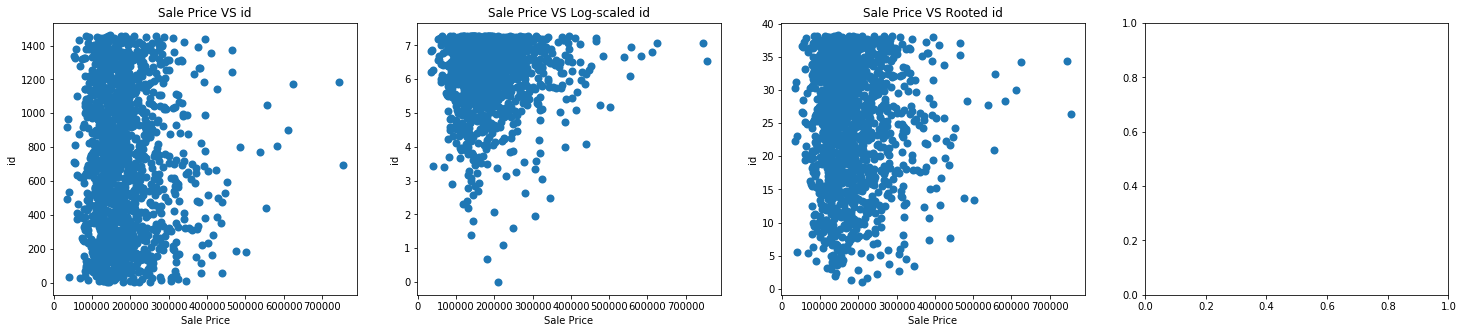

This grapsh is not available due to data type


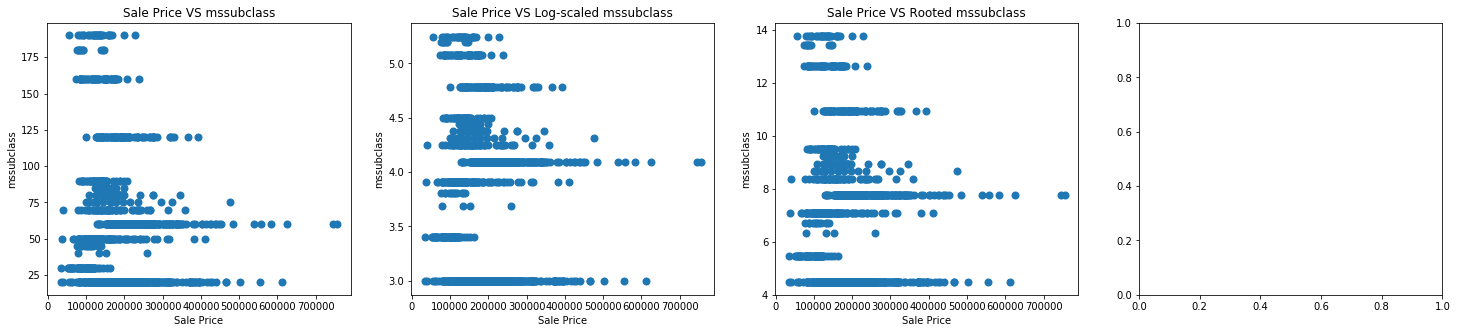

This grapsh is not available due to data type


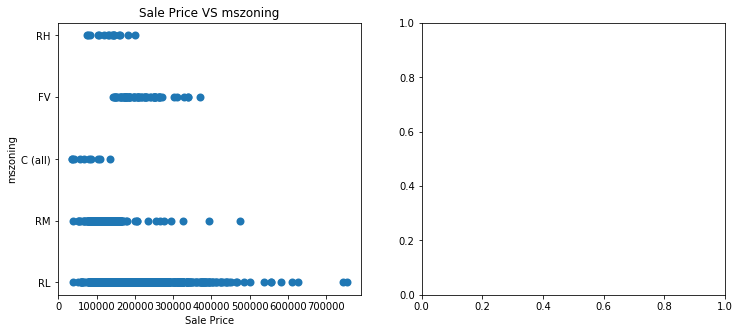

This grapsh is not available due to data type


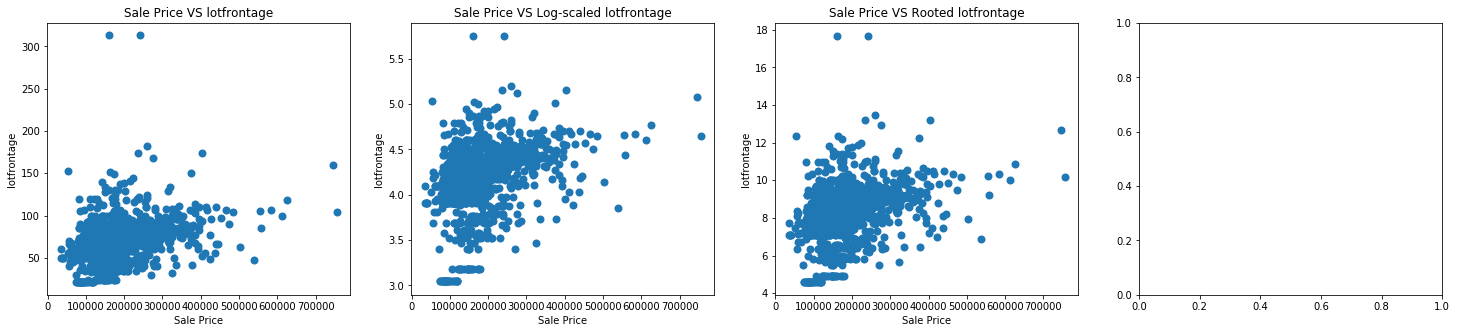

This grapsh is not available due to data type


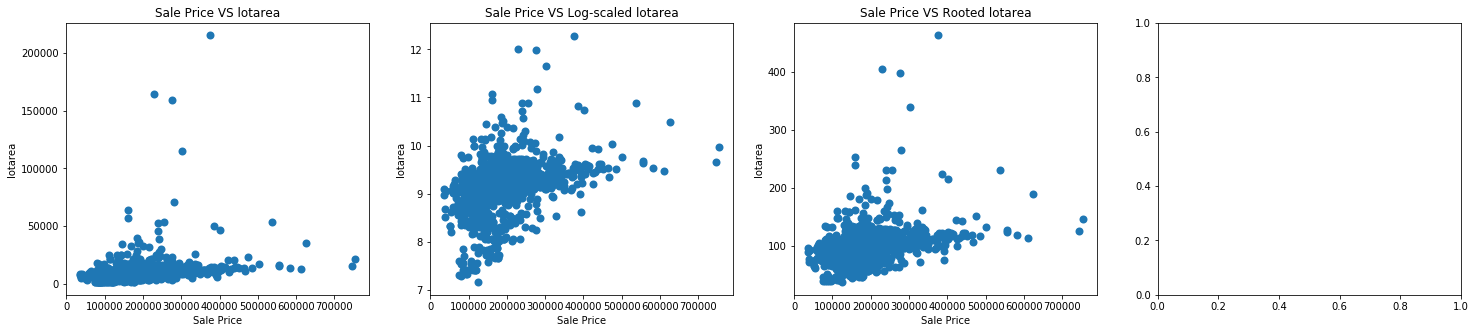

This grapsh is not available due to data type


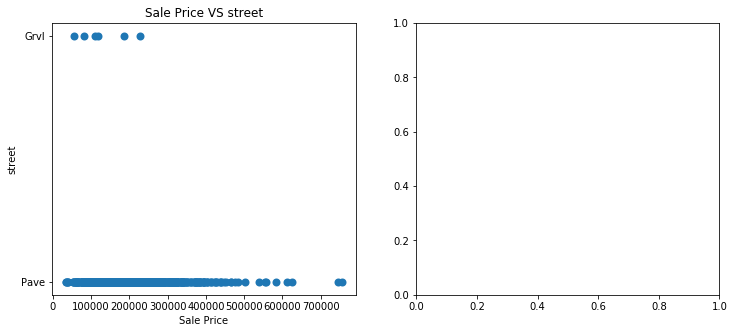

This grapsh is not available due to data type


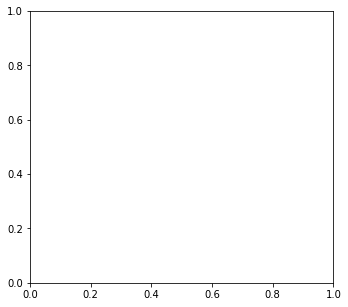

This grapsh is not available due to data type


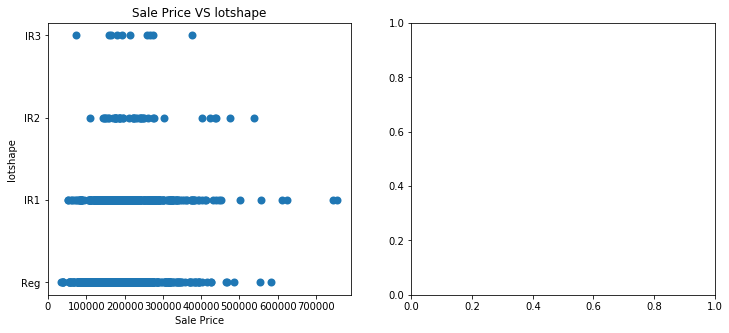

This grapsh is not available due to data type


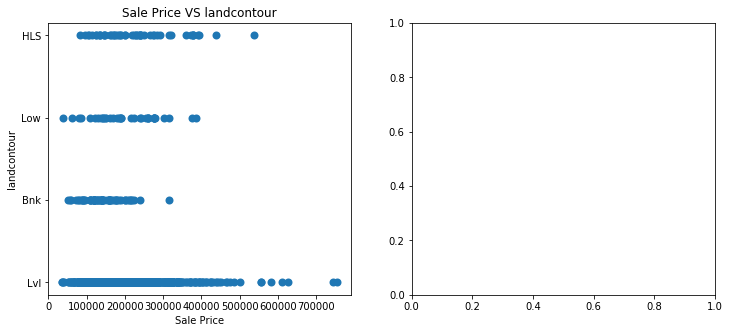

This grapsh is not available due to data type


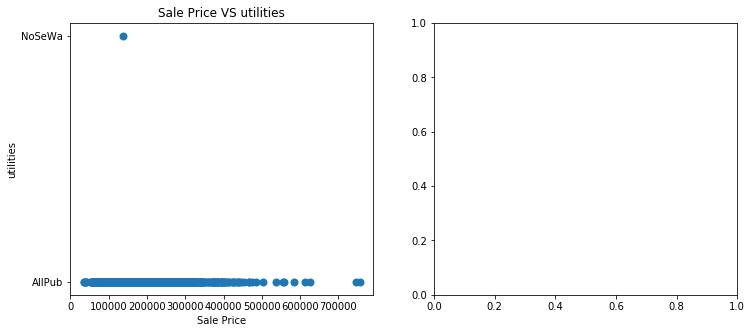

This grapsh is not available due to data type


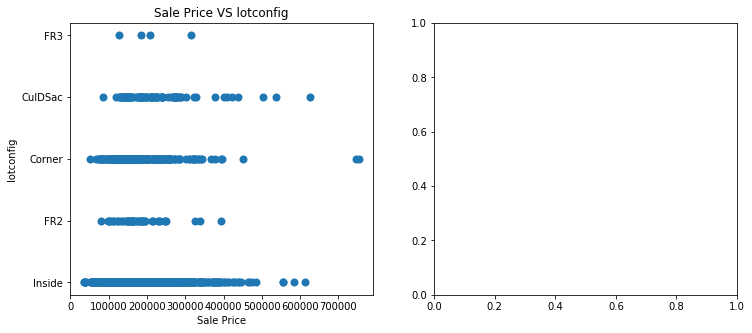

This grapsh is not available due to data type


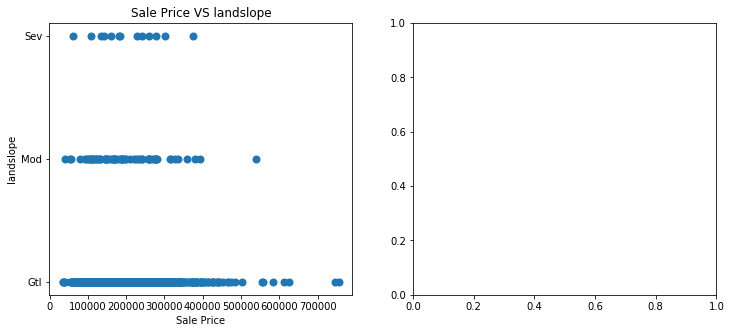

This grapsh is not available due to data type


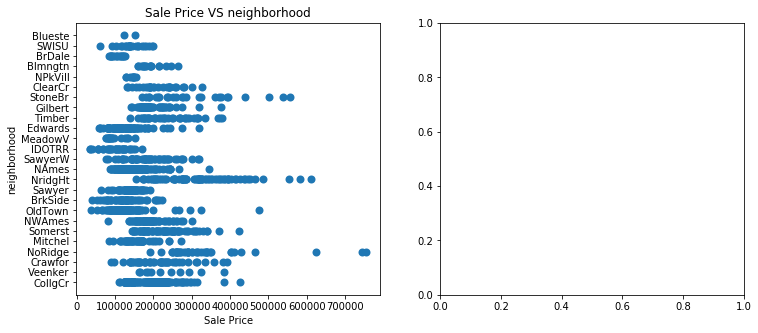

This grapsh is not available due to data type


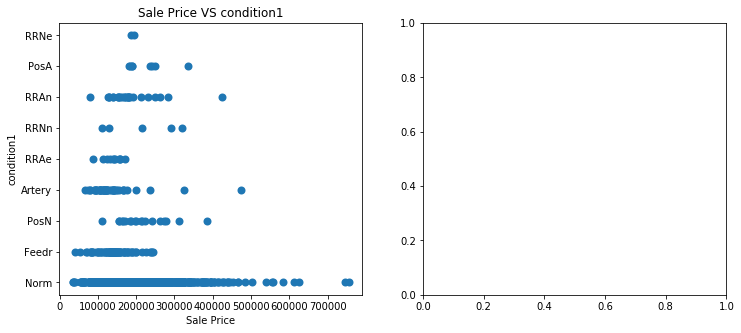

This grapsh is not available due to data type


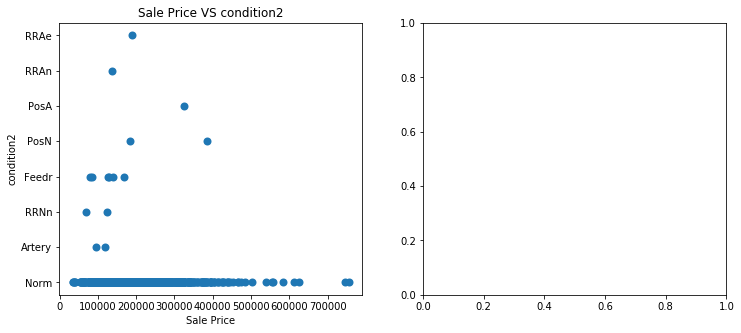

This grapsh is not available due to data type


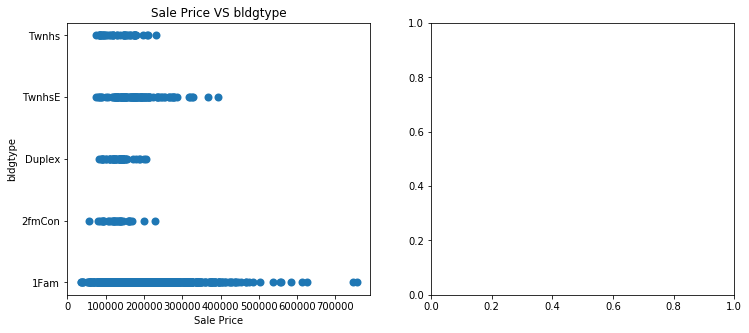

This grapsh is not available due to data type


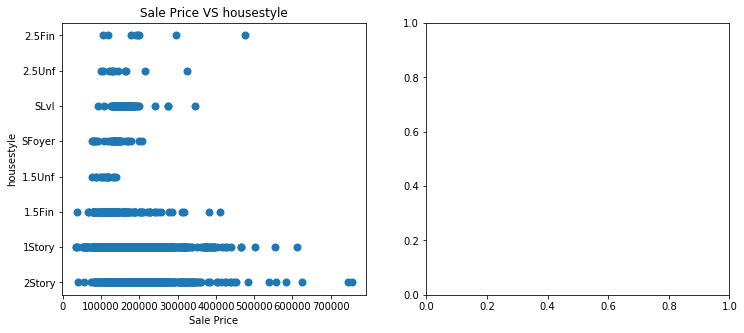

This grapsh is not available due to data type


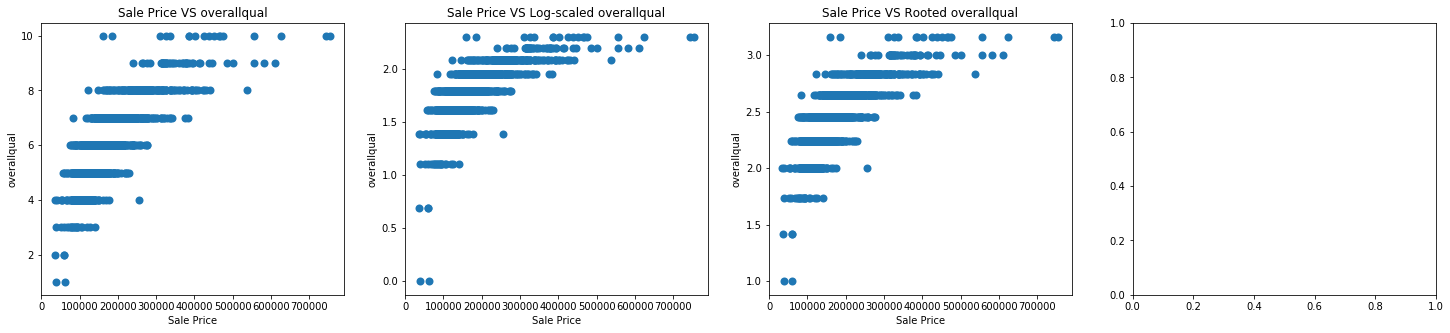

This grapsh is not available due to data type


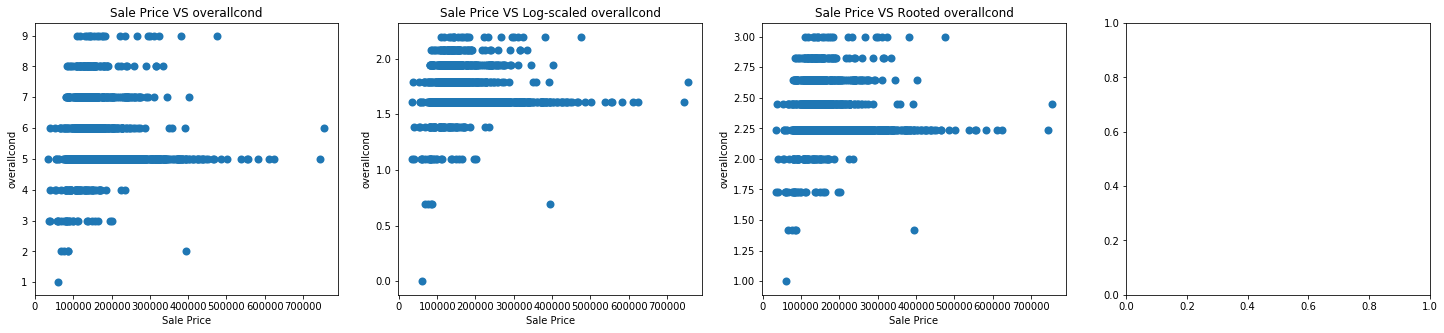

This grapsh is not available due to data type


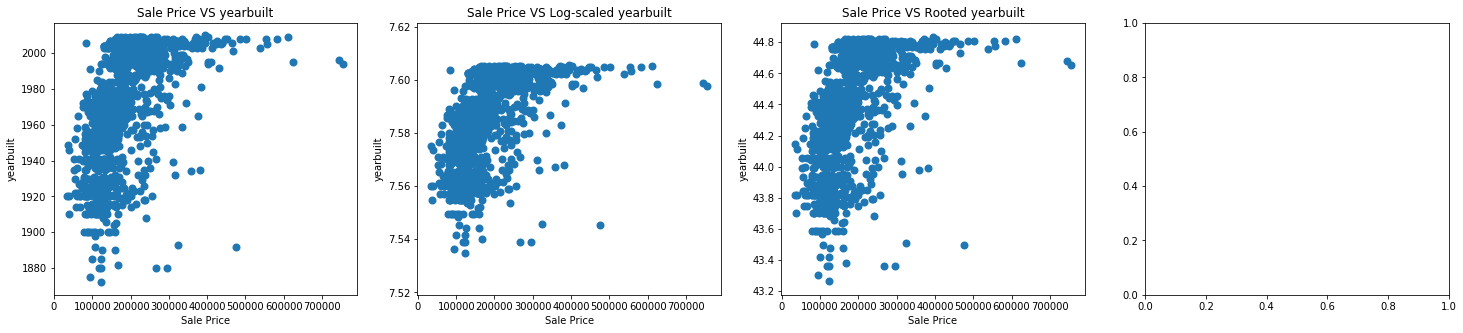

This grapsh is not available due to data type


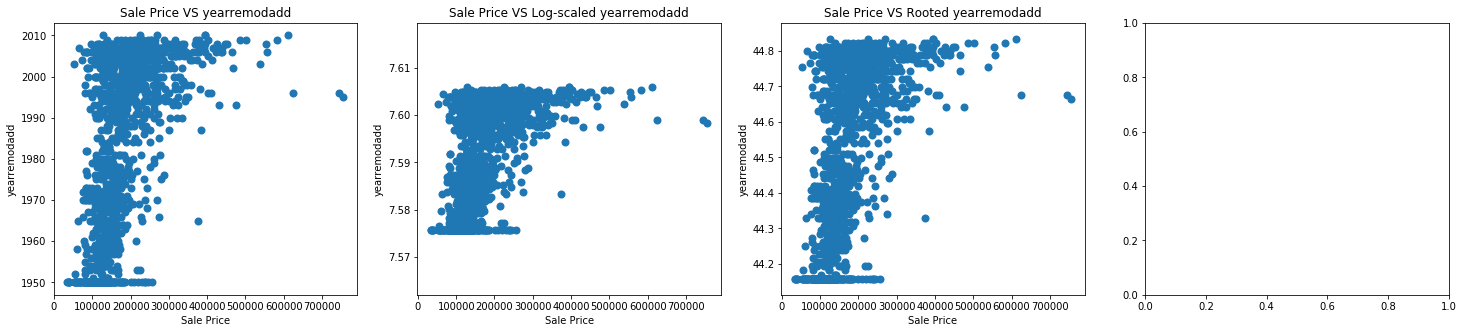

This grapsh is not available due to data type


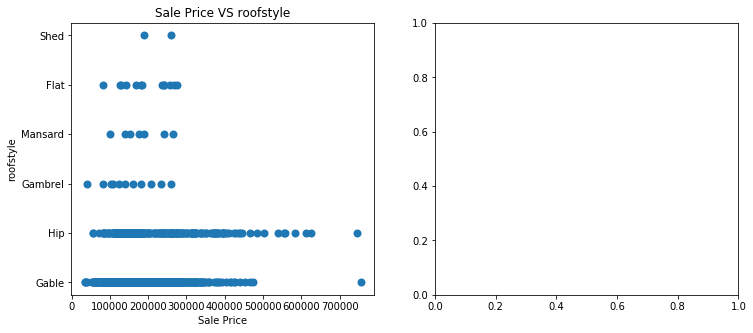

This grapsh is not available due to data type


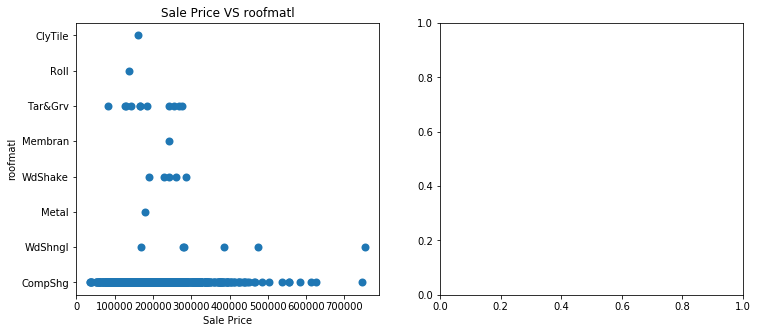

This grapsh is not available due to data type


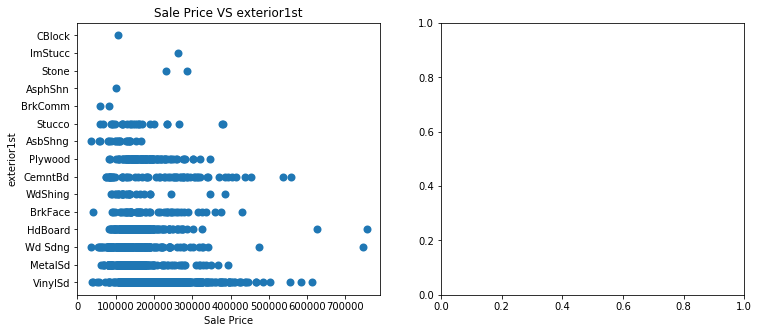

This grapsh is not available due to data type


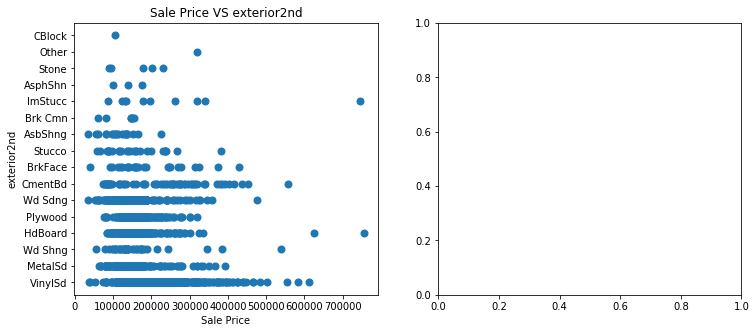

This grapsh is not available due to data type


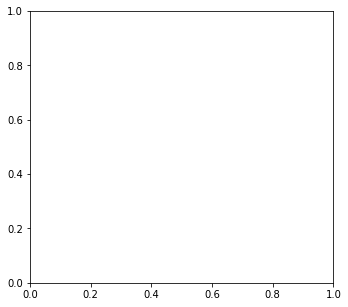

This grapsh is not available due to data type


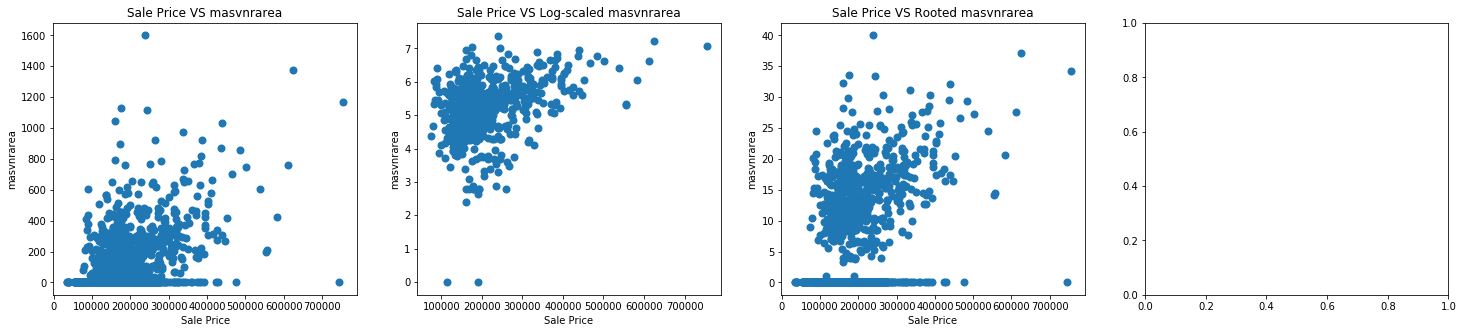

This grapsh is not available due to data type


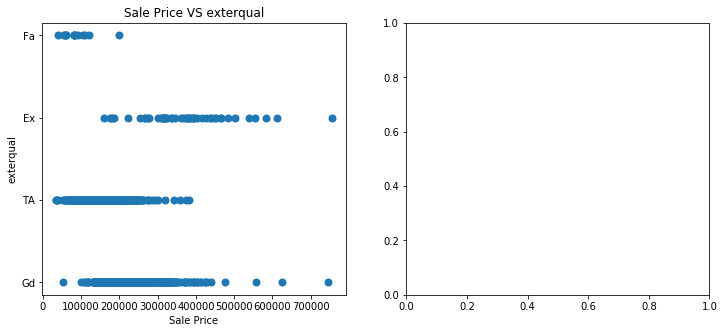

This grapsh is not available due to data type


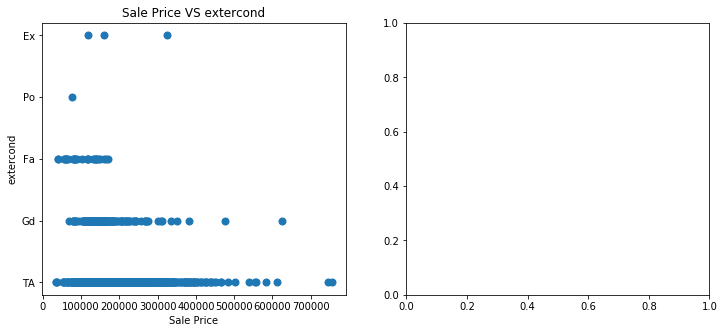

This grapsh is not available due to data type


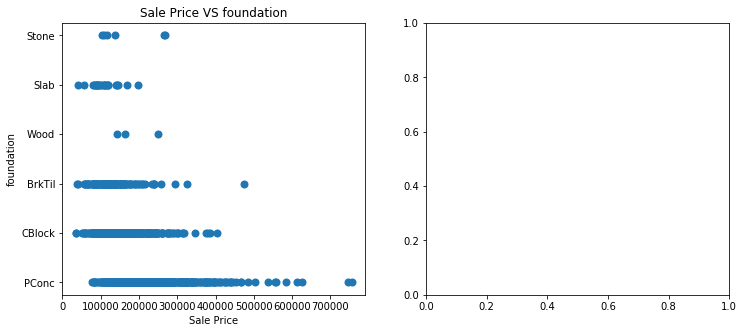

This grapsh is not available due to data type


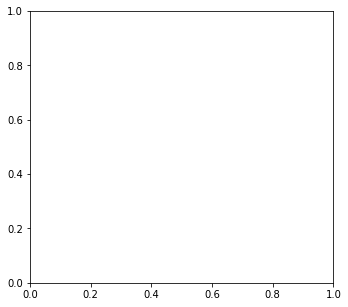

This grapsh is not available due to data type


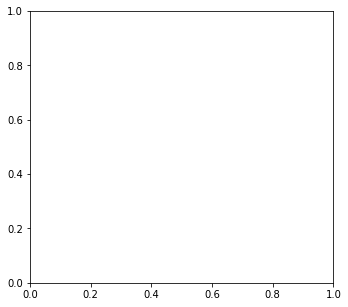

This grapsh is not available due to data type


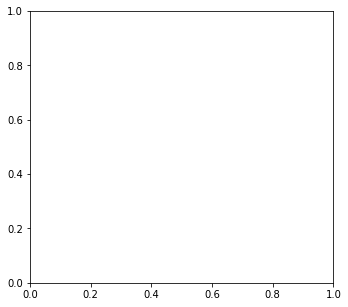

This grapsh is not available due to data type


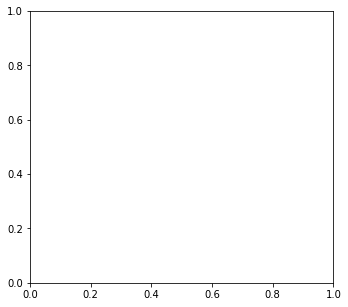

This grapsh is not available due to data type


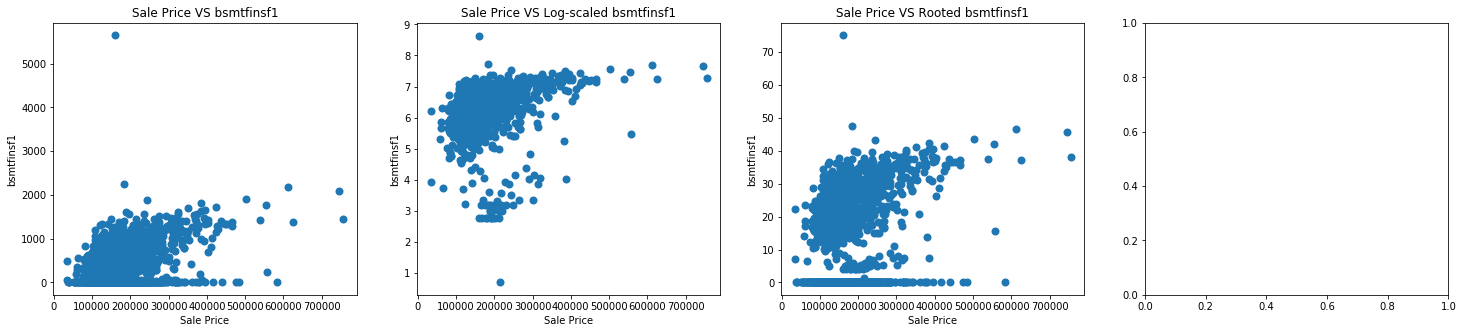

This grapsh is not available due to data type


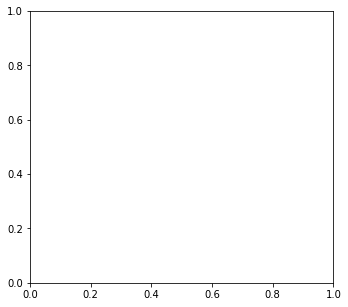

This grapsh is not available due to data type


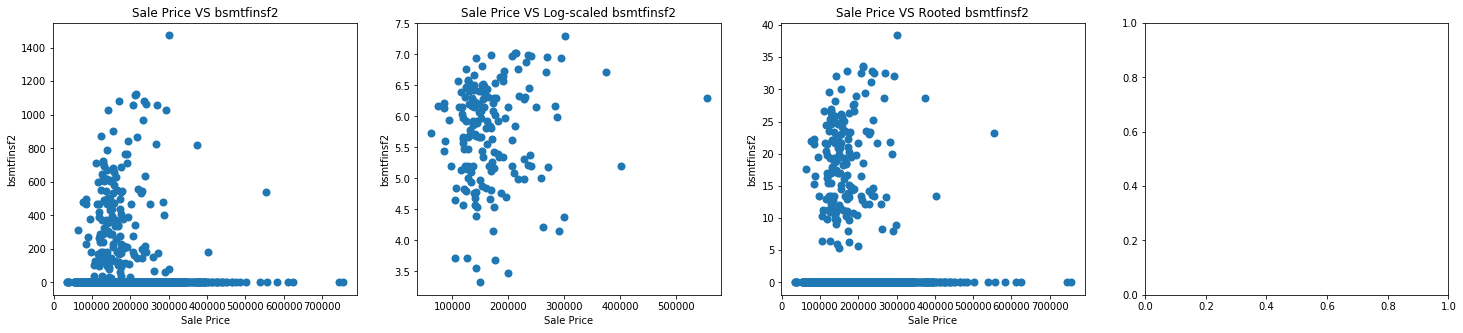

This grapsh is not available due to data type


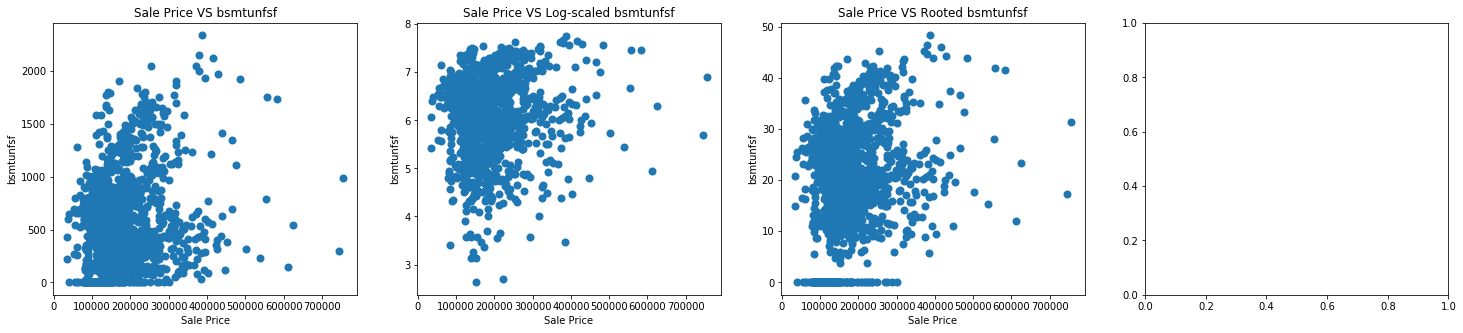

This grapsh is not available due to data type


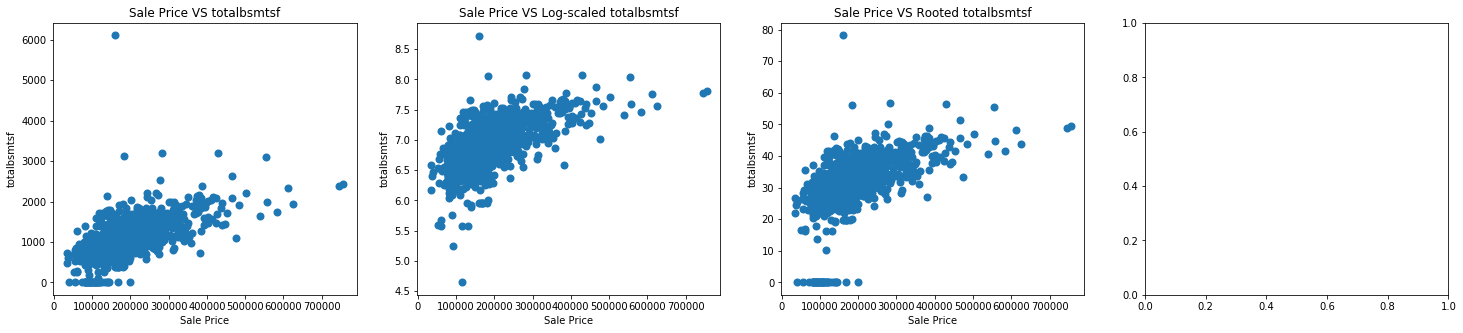

This grapsh is not available due to data type


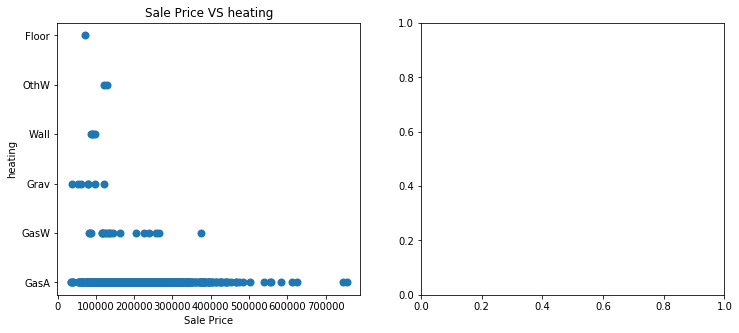

This grapsh is not available due to data type


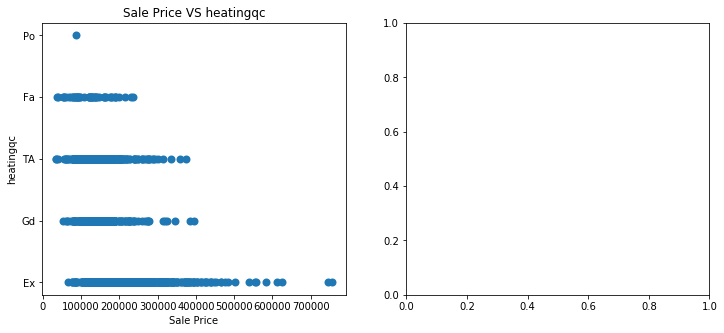

This grapsh is not available due to data type


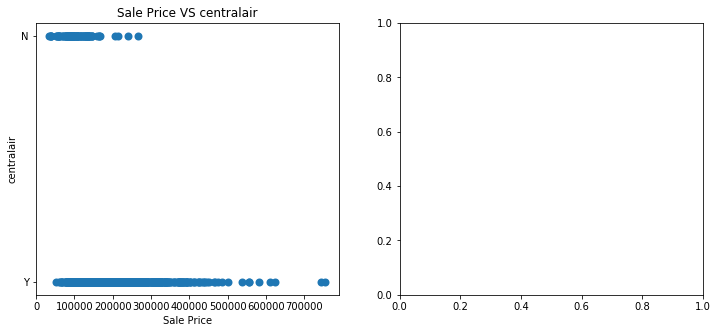

This grapsh is not available due to data type


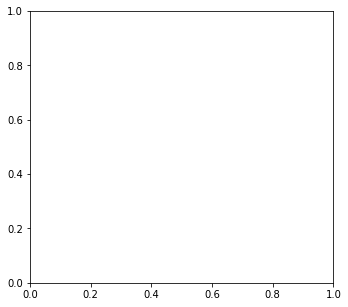

This grapsh is not available due to data type


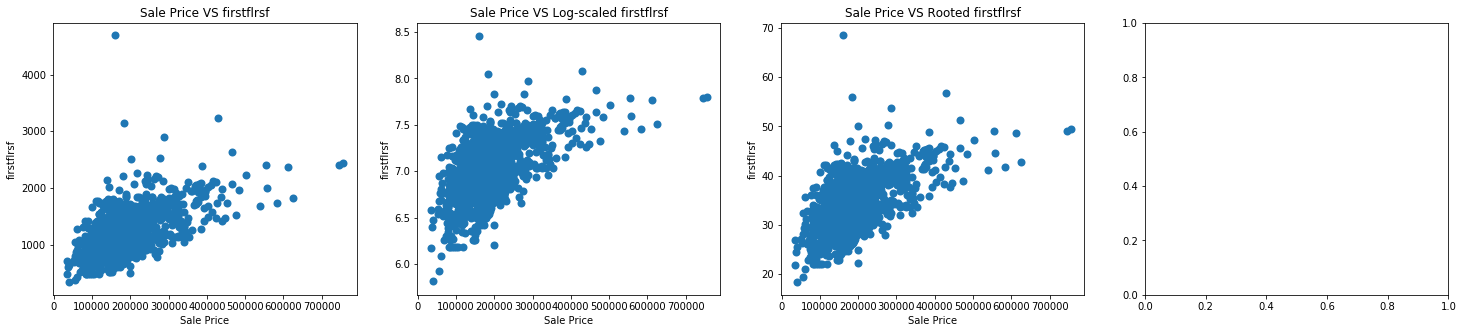

This grapsh is not available due to data type


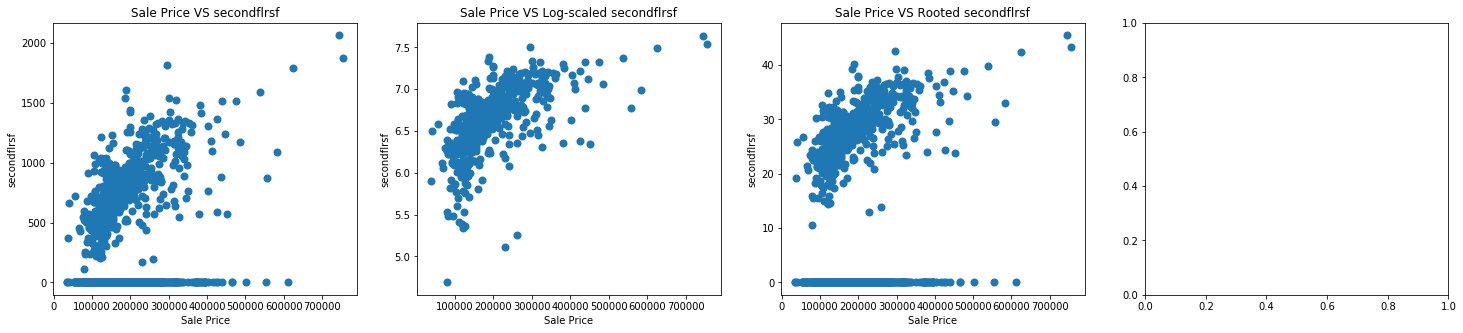

This grapsh is not available due to data type


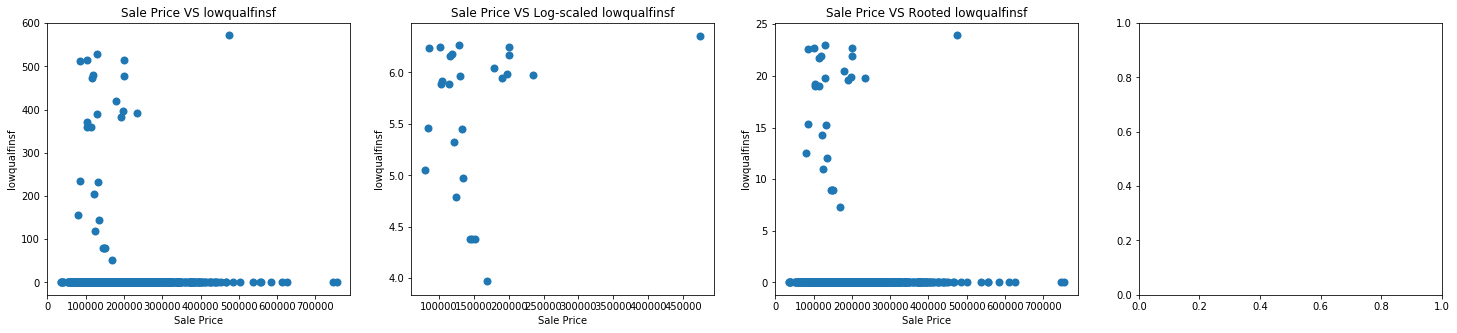

This grapsh is not available due to data type


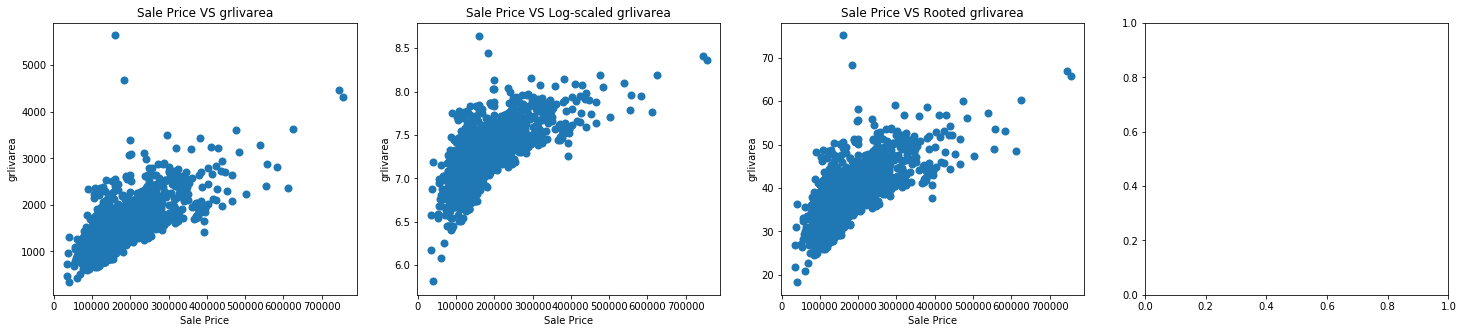

This grapsh is not available due to data type


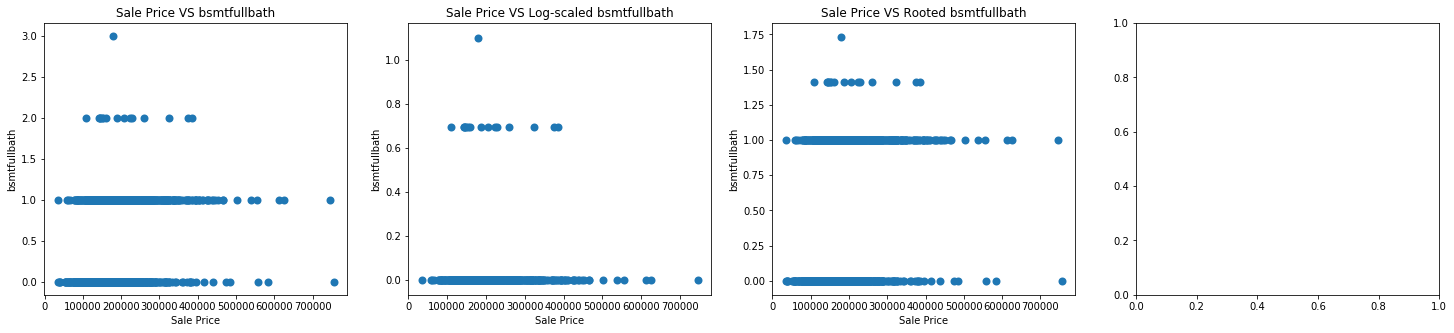

This grapsh is not available due to data type


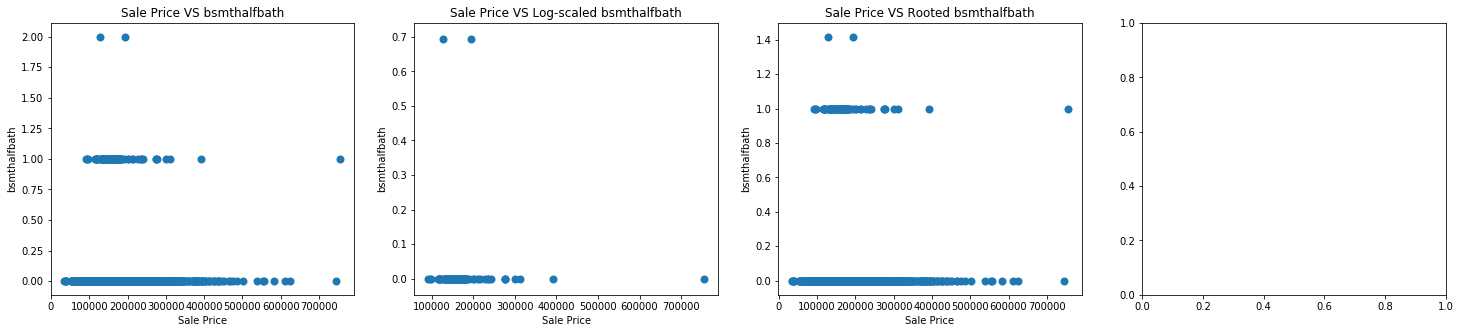

This grapsh is not available due to data type


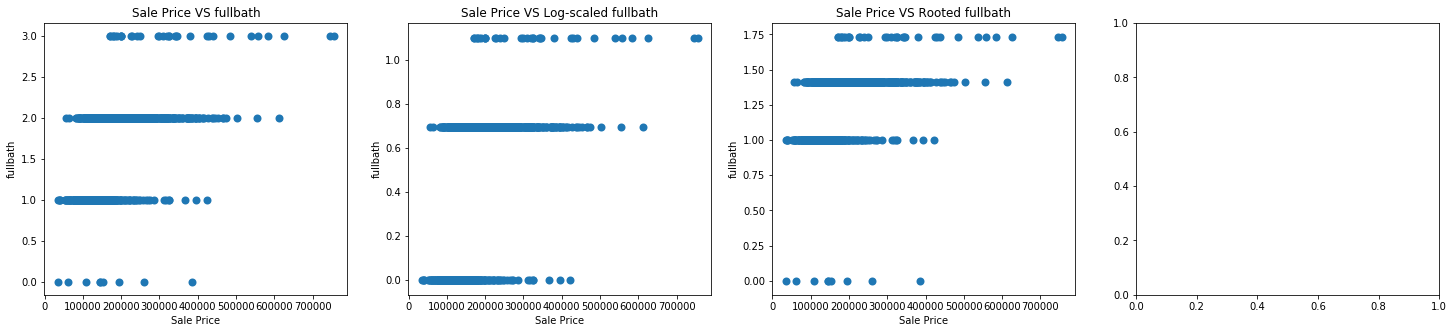

This grapsh is not available due to data type


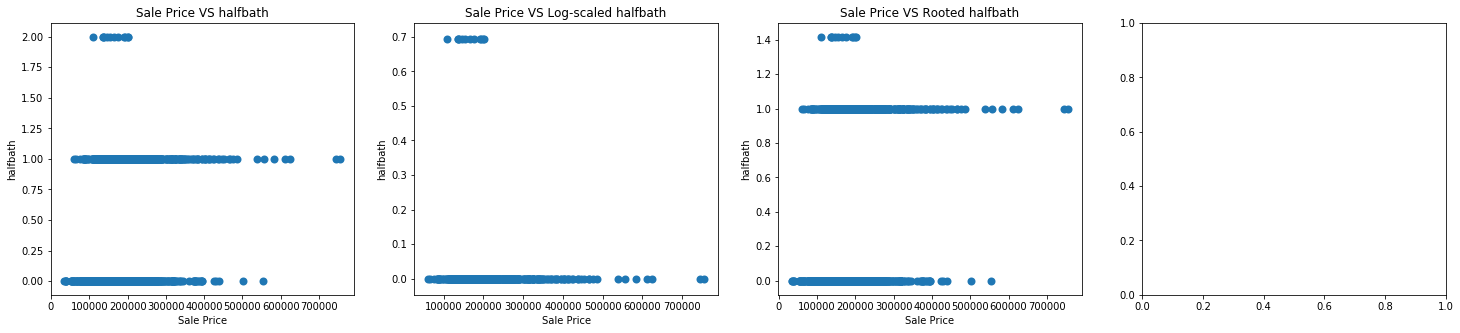

This grapsh is not available due to data type


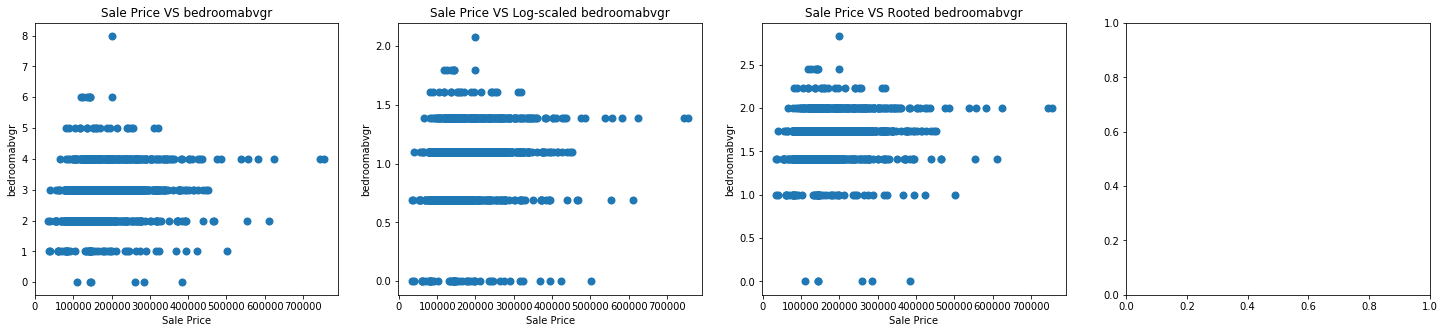

This grapsh is not available due to data type


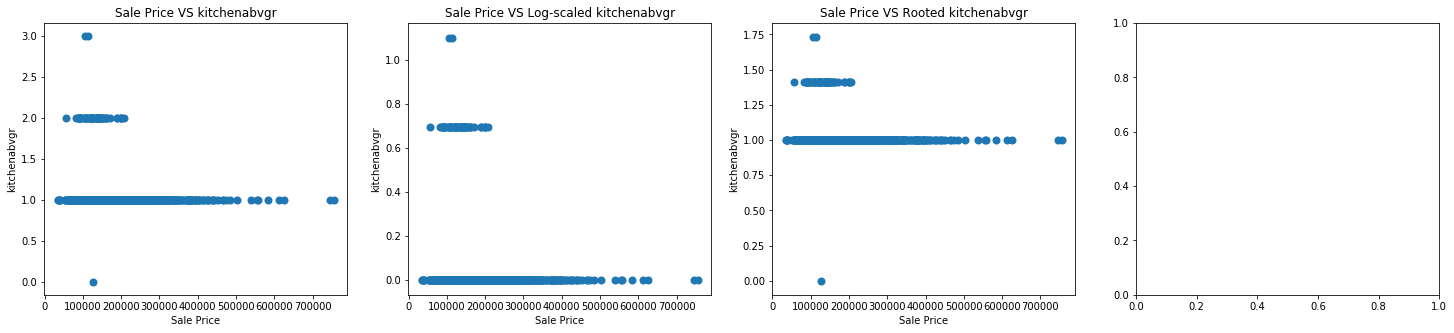

This grapsh is not available due to data type


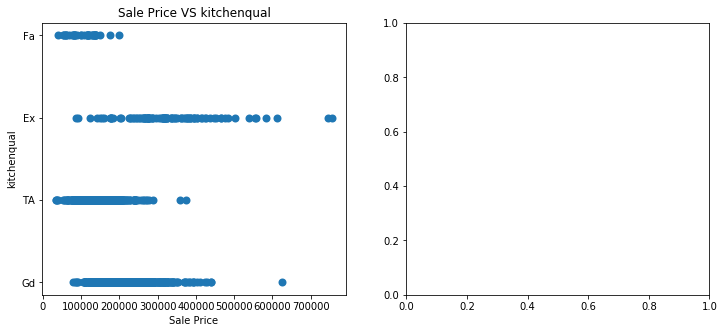

This grapsh is not available due to data type


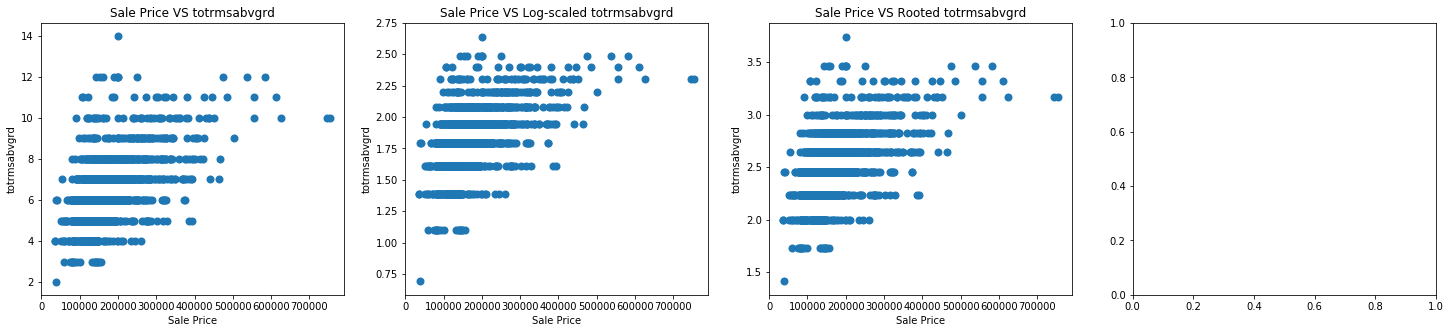

This grapsh is not available due to data type


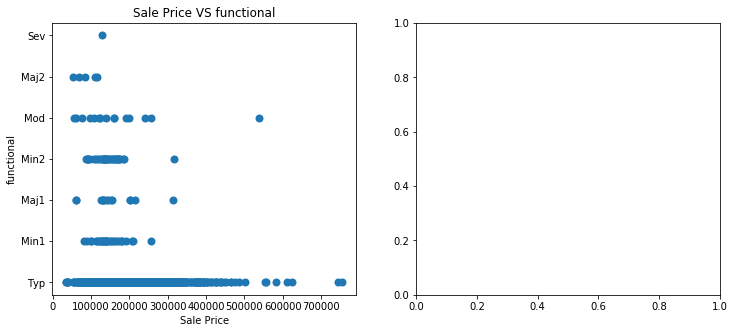

This grapsh is not available due to data type


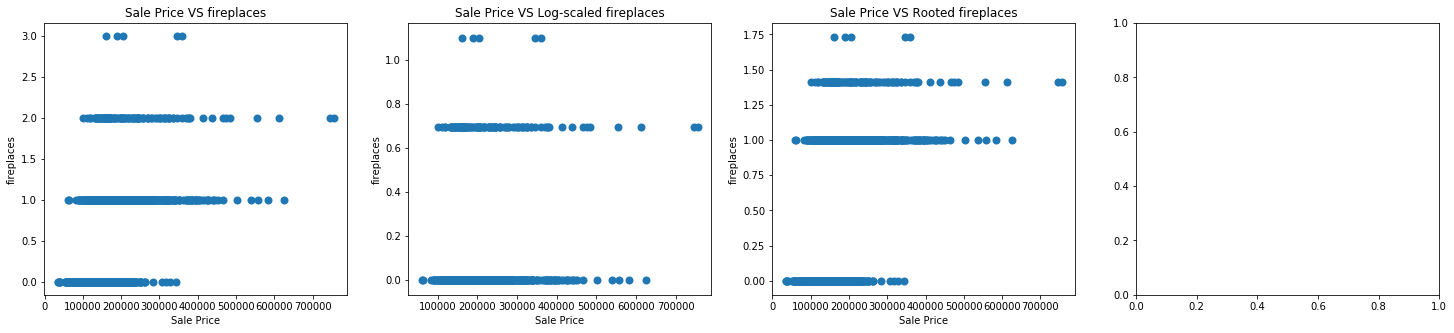

This grapsh is not available due to data type


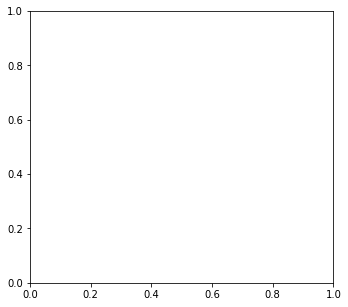

This grapsh is not available due to data type


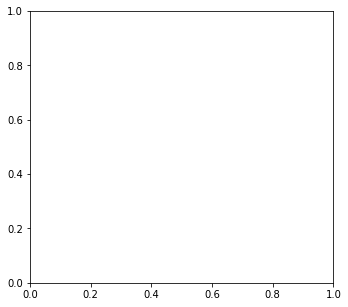

This grapsh is not available due to data type


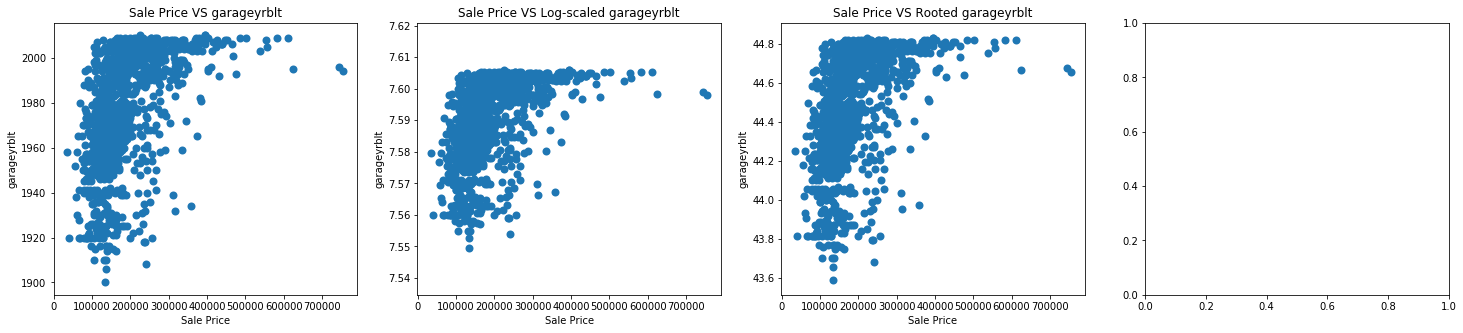

This grapsh is not available due to data type


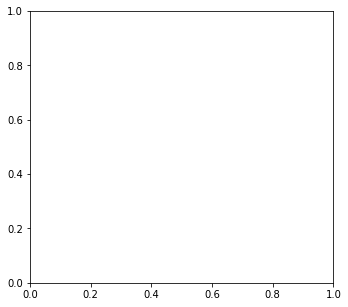

This grapsh is not available due to data type


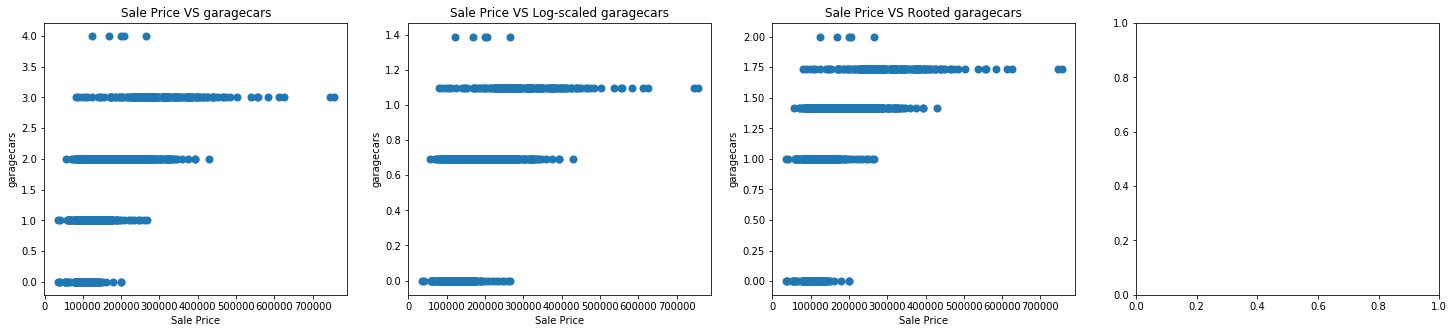

This grapsh is not available due to data type


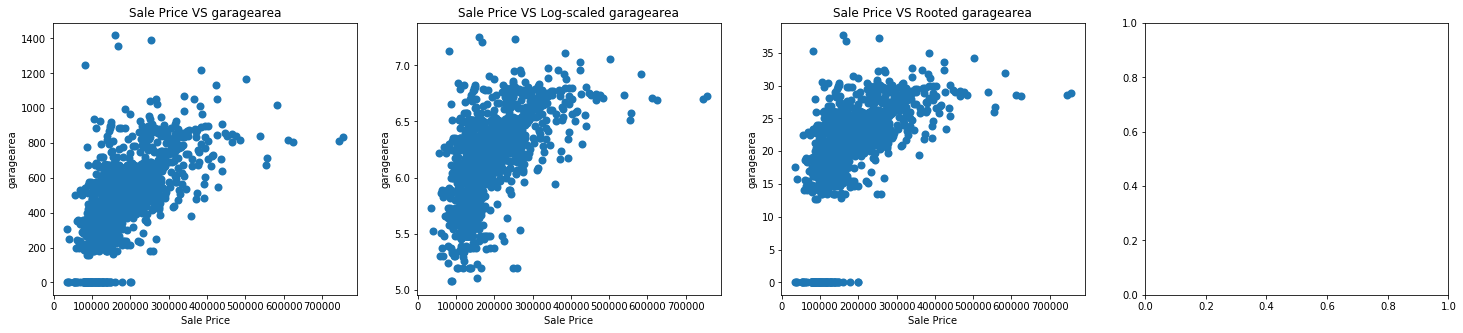

This grapsh is not available due to data type


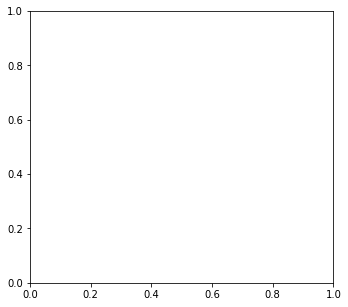

This grapsh is not available due to data type


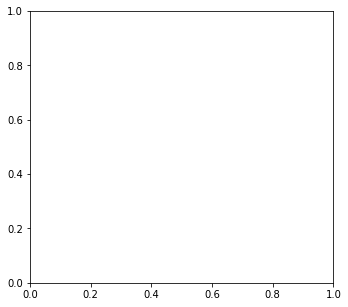

This grapsh is not available due to data type


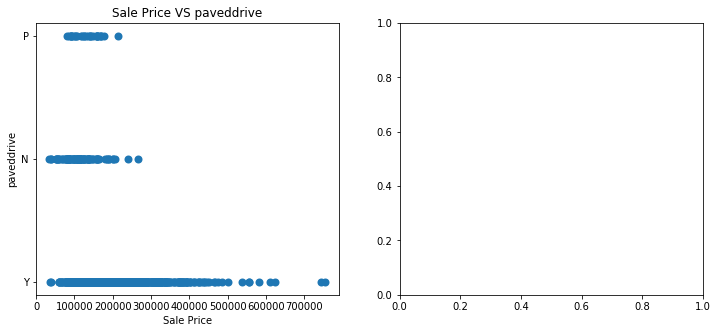

This grapsh is not available due to data type


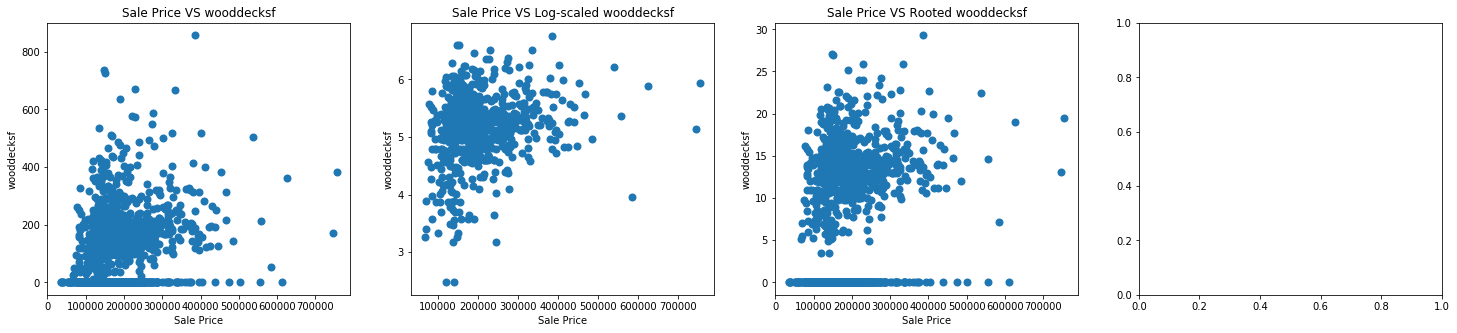

This grapsh is not available due to data type


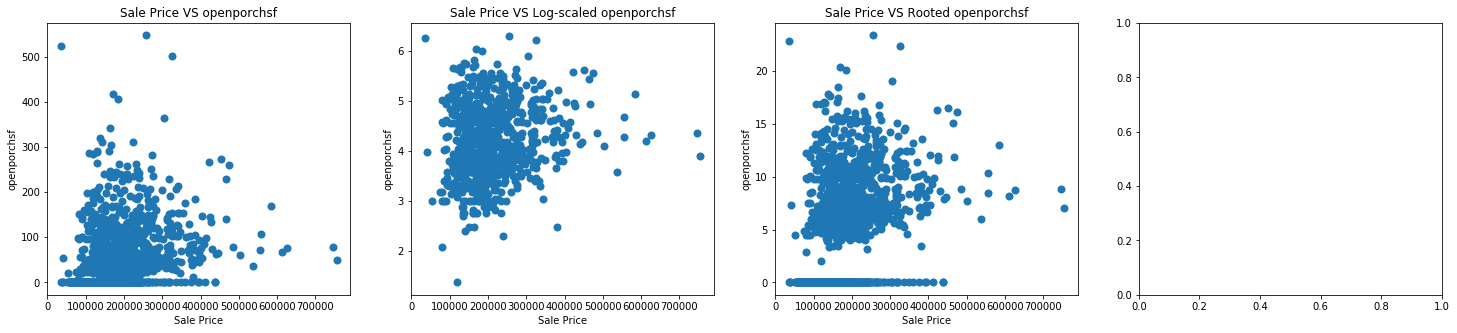

This grapsh is not available due to data type


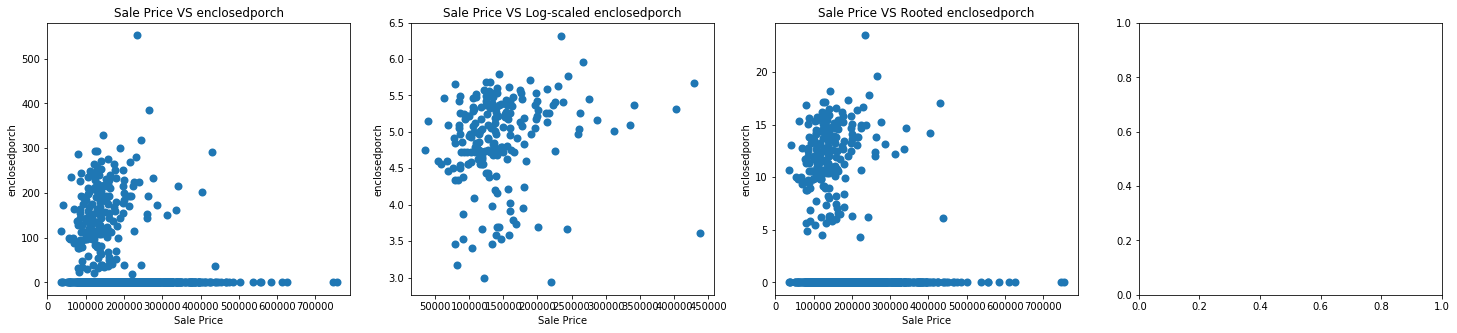

This grapsh is not available due to data type


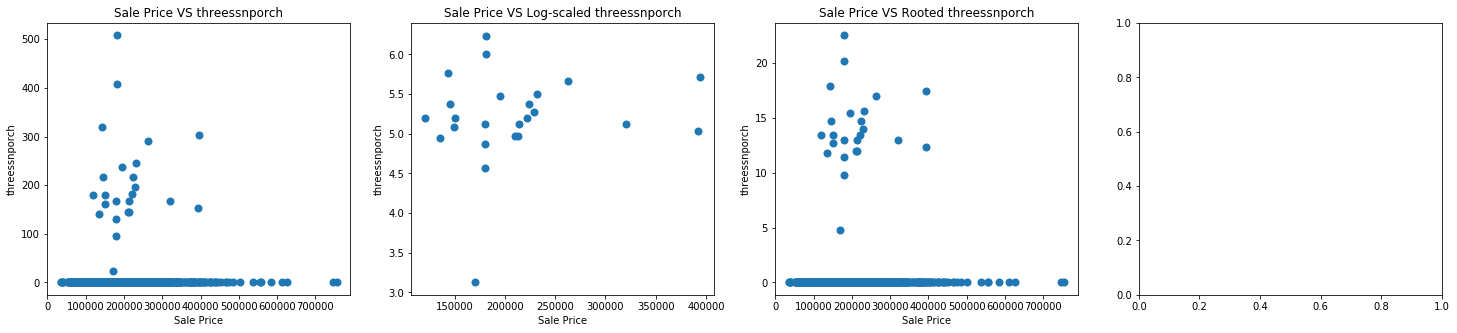

This grapsh is not available due to data type


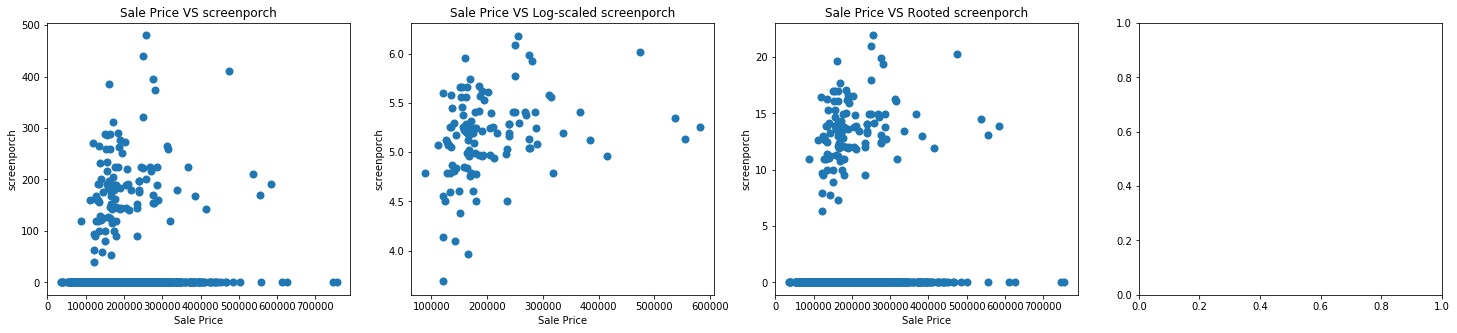

This grapsh is not available due to data type


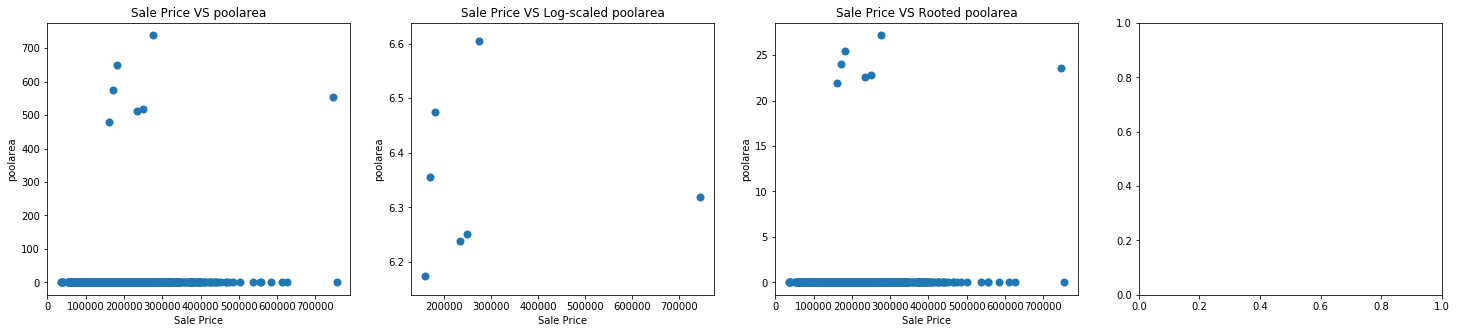

This grapsh is not available due to data type


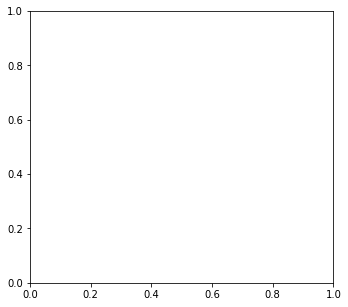

This grapsh is not available due to data type


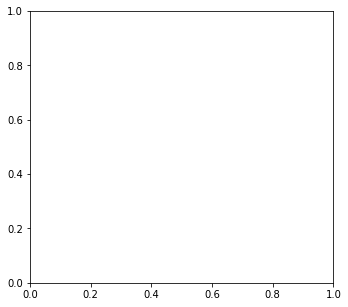

This grapsh is not available due to data type


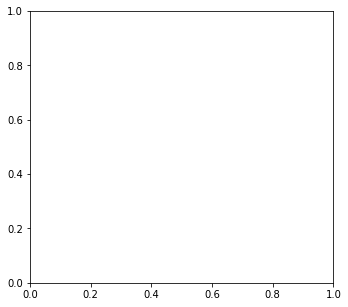

This grapsh is not available due to data type


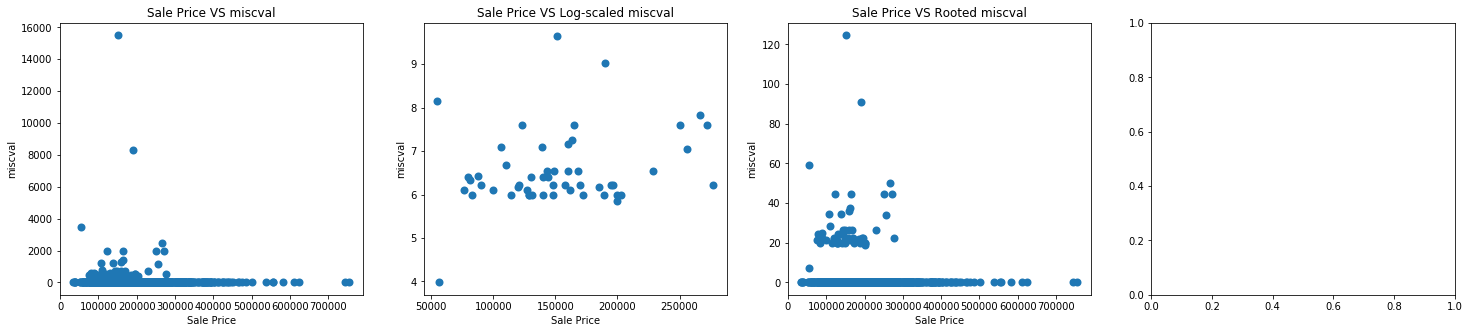

This grapsh is not available due to data type


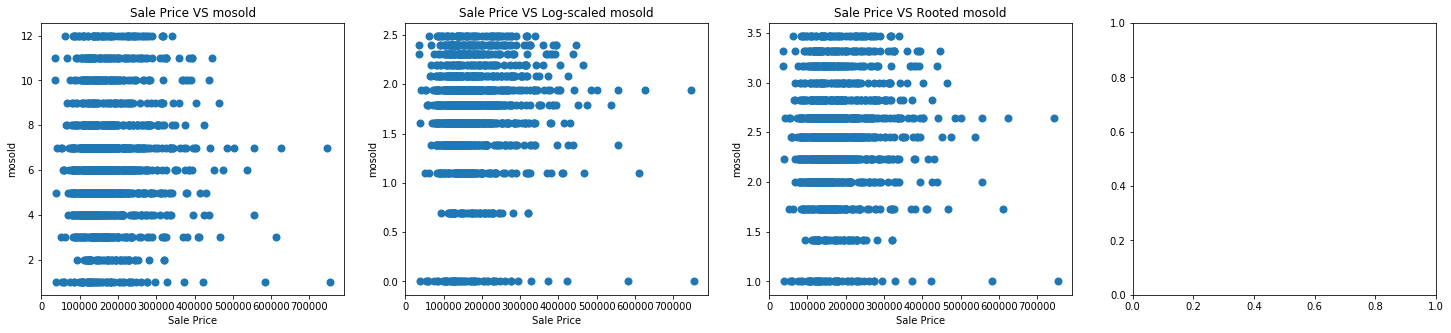

This grapsh is not available due to data type


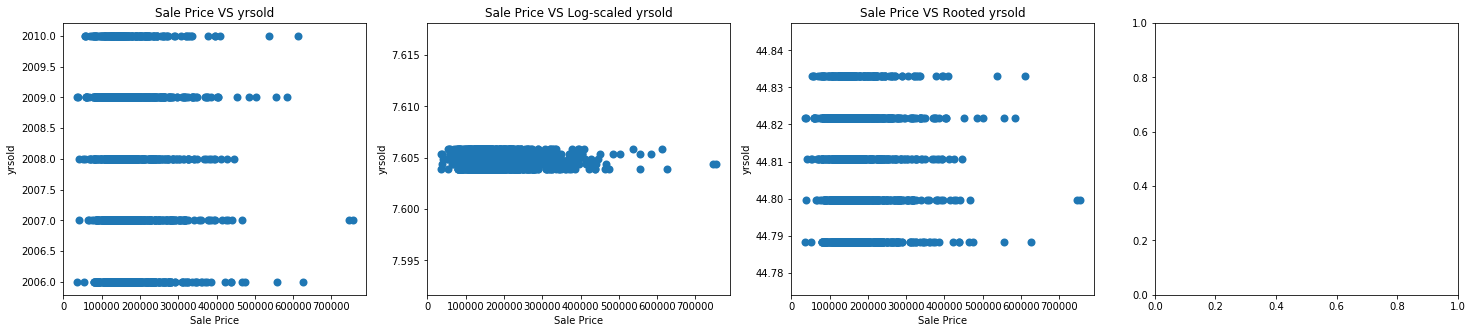

This grapsh is not available due to data type


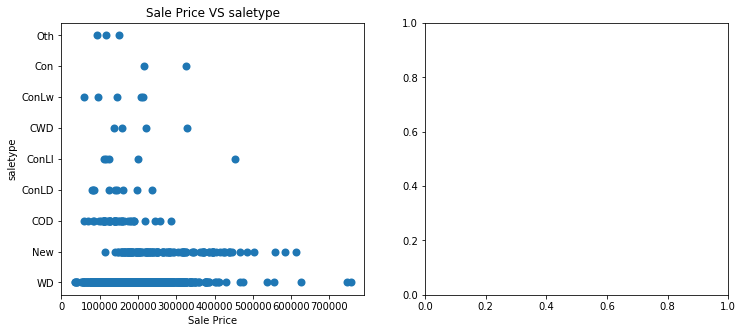

This grapsh is not available due to data type


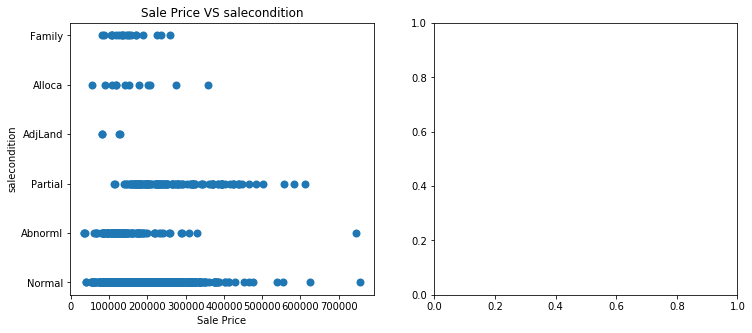

This grapsh is not available due to data type


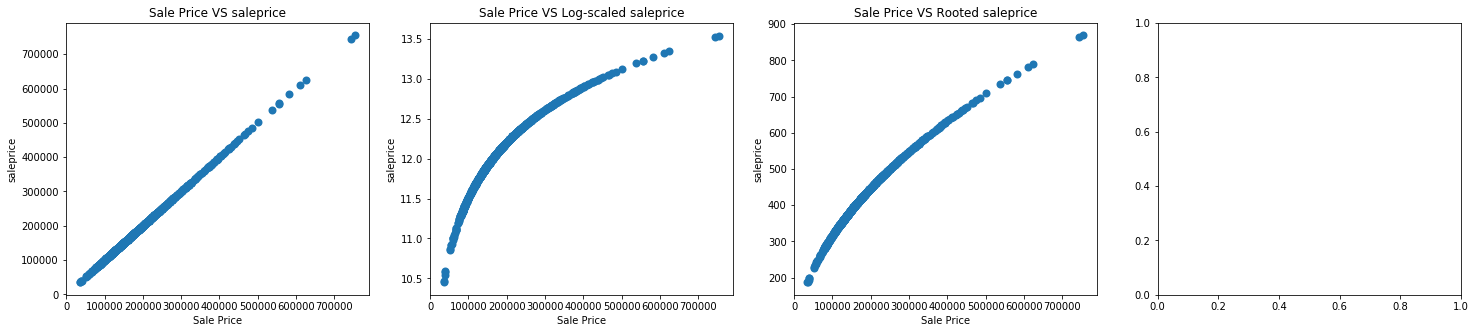

In [9]:
# Let's check the relativeness between two variable, sales price and each columns by scatter plot and then
# Let's change the data by winsorize, sqrt and logscaled.
# Let's do it with normal salesprice first, then next time I will do with log-scaled salesprice because of its unit.
for col in hp_df.columns:
    try: 
        x = hp_df['saleprice']
        y = hp_df[col]
        plt.figure(figsize=(25,5))
        
        plt.subplot(1, 4, 1)
        plt.scatter(x, y, linewidths=2)
        plt.title('Sale Price VS {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 2)
        plt.scatter(x, np.log(y), linewidths=2)
        plt.title('Sale Price VS Log-scaled {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 3)
        plt.scatter(x, np.sqrt(y), linewidths=2)
        plt.title('Sale Price VS Rooted {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 4)
        plt.scatter(x, winsorize(y), linewidths=2)
        plt.title('Sale Price VS Winsorized {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
    except:
        print('This grapsh is not available due to data type')
    plt.show()

This grapsh is not available due to data type


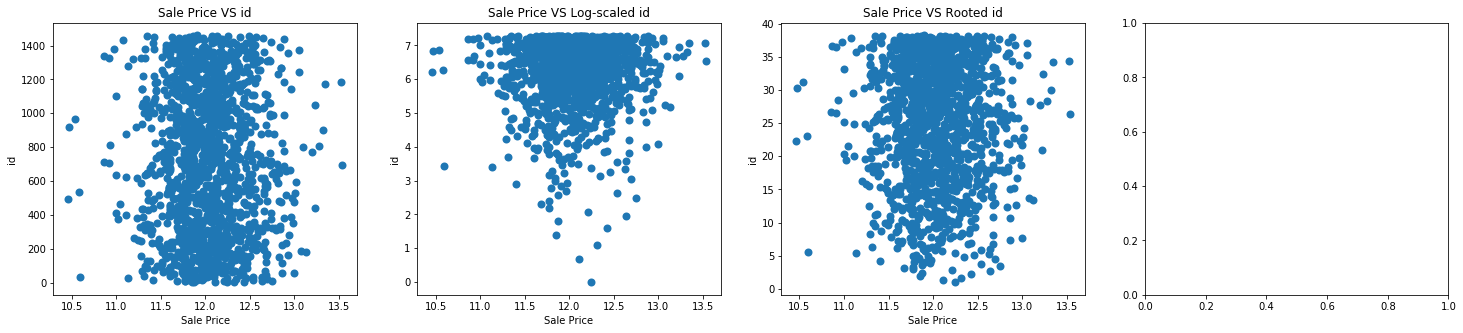

This grapsh is not available due to data type


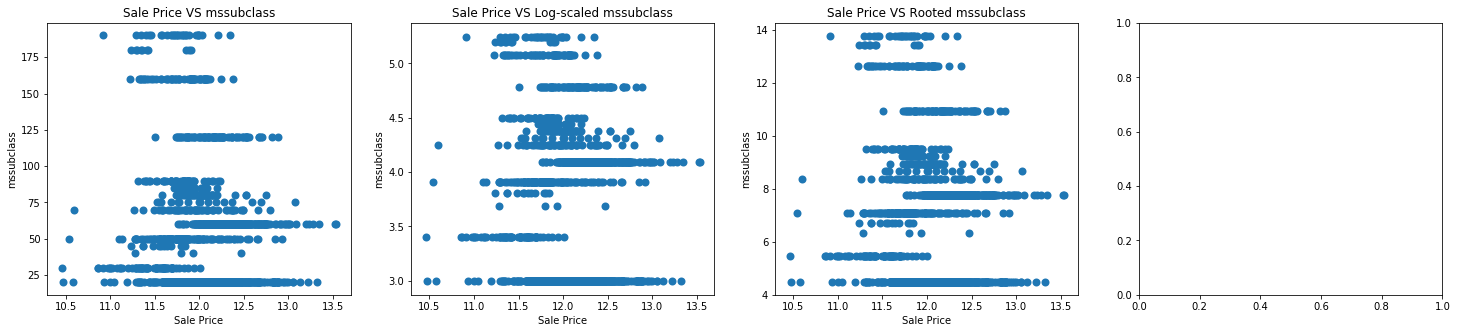

This grapsh is not available due to data type


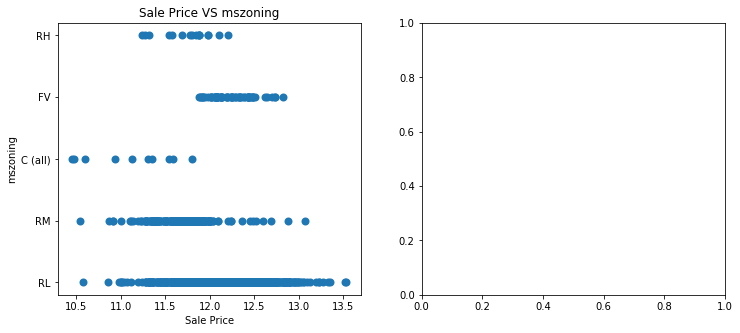

This grapsh is not available due to data type


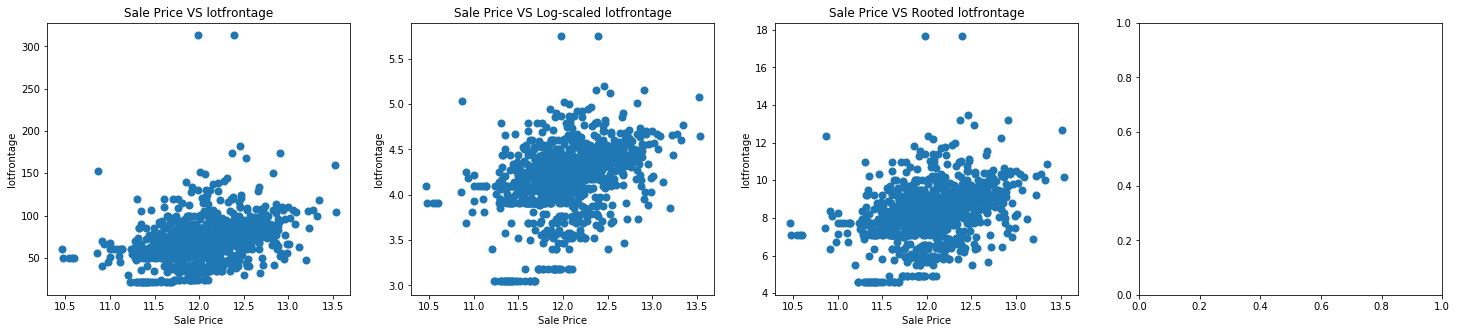

This grapsh is not available due to data type


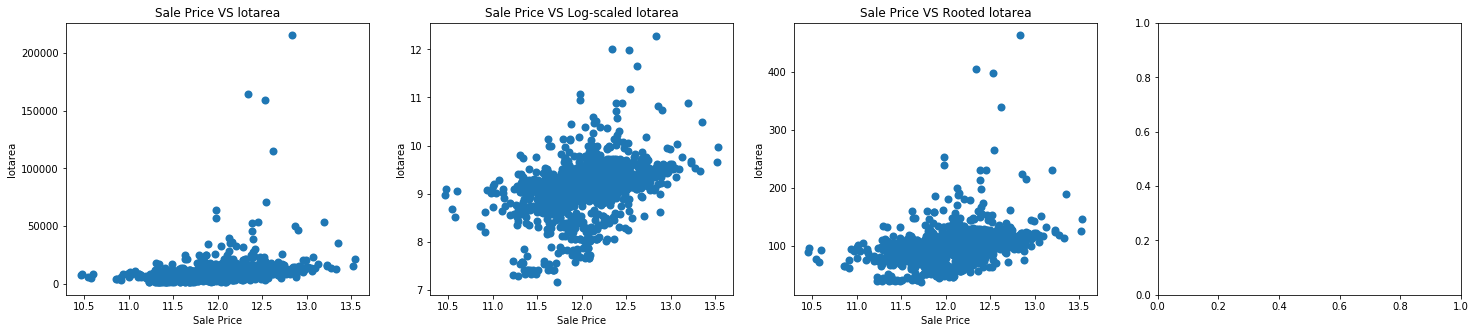

This grapsh is not available due to data type


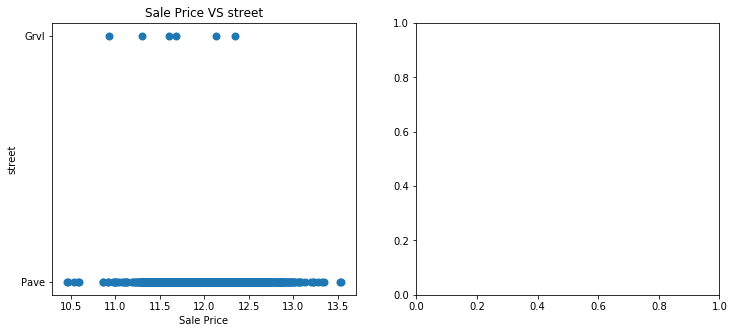

This grapsh is not available due to data type


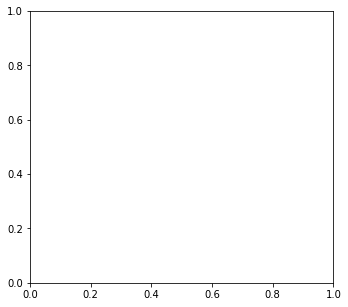

This grapsh is not available due to data type


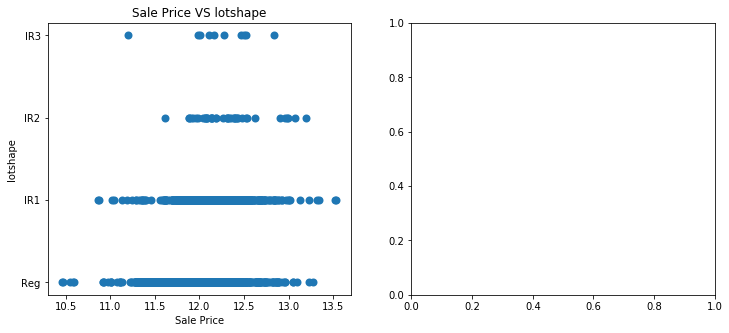

This grapsh is not available due to data type


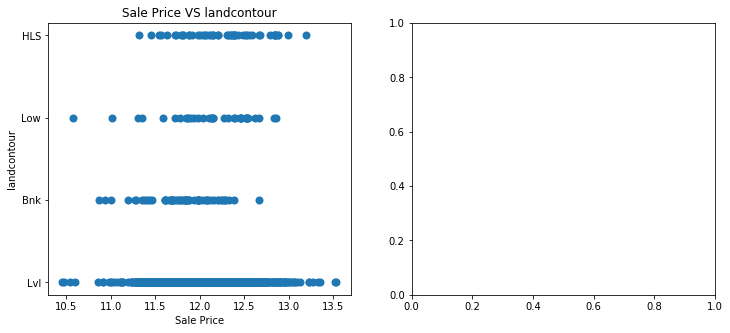

This grapsh is not available due to data type


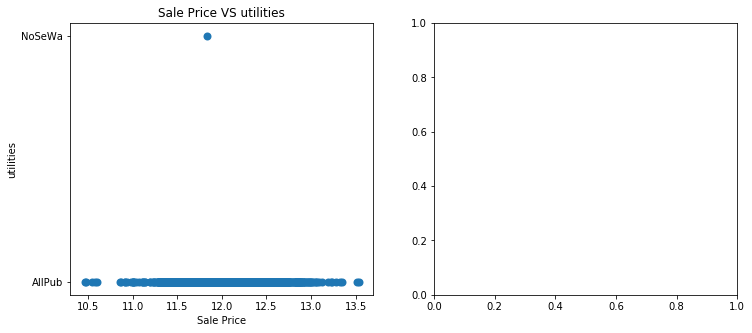

This grapsh is not available due to data type


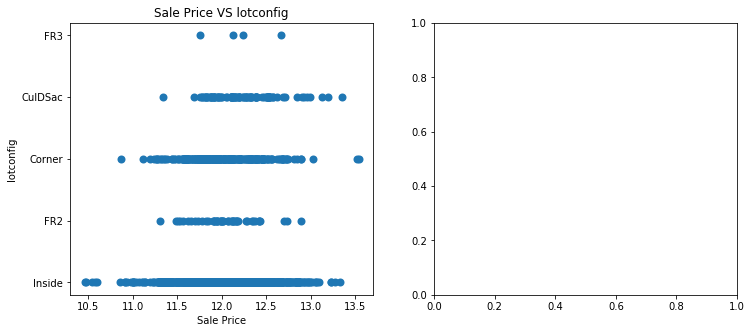

This grapsh is not available due to data type


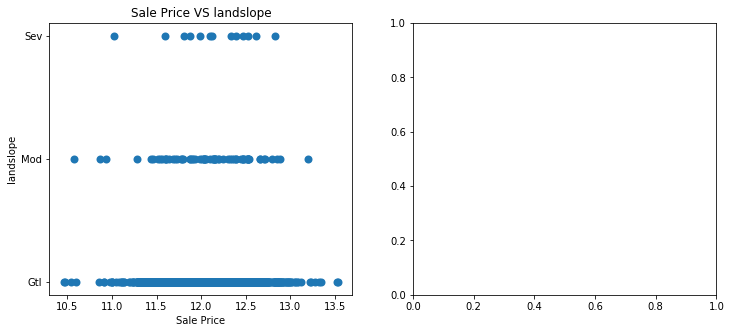

This grapsh is not available due to data type


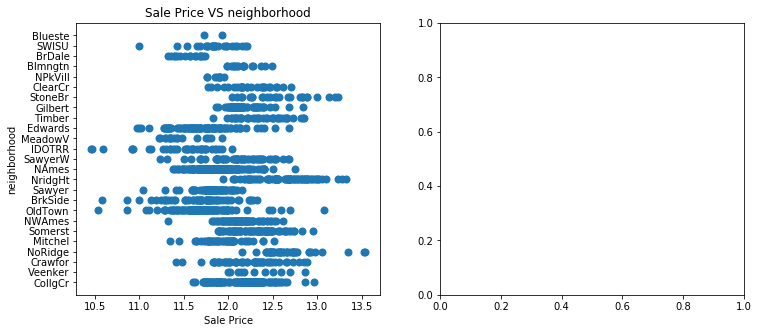

This grapsh is not available due to data type


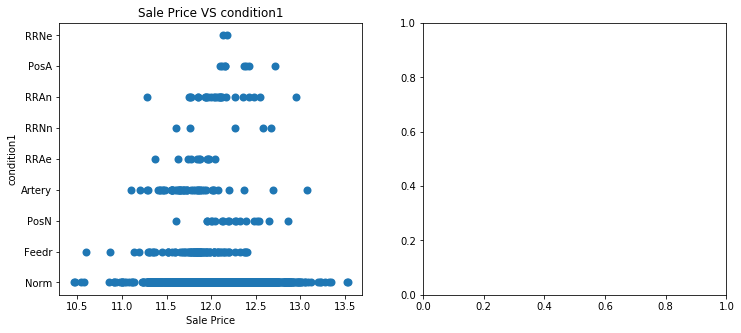

This grapsh is not available due to data type


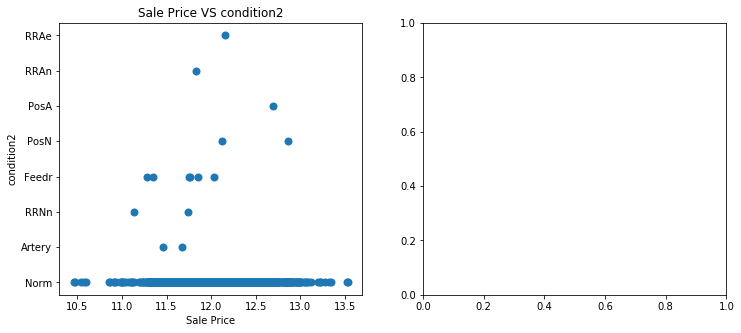

This grapsh is not available due to data type


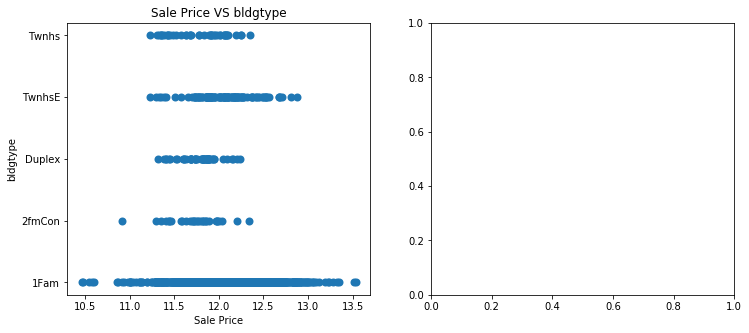

This grapsh is not available due to data type


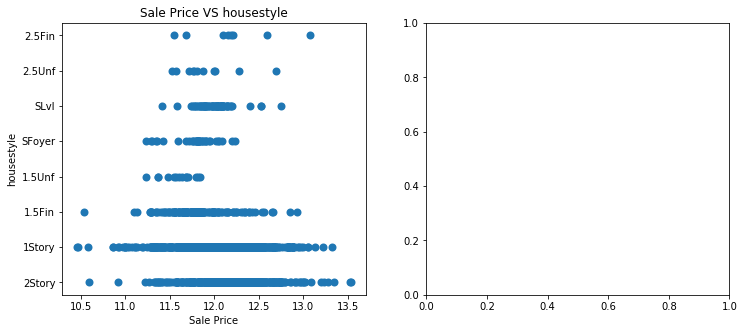

This grapsh is not available due to data type


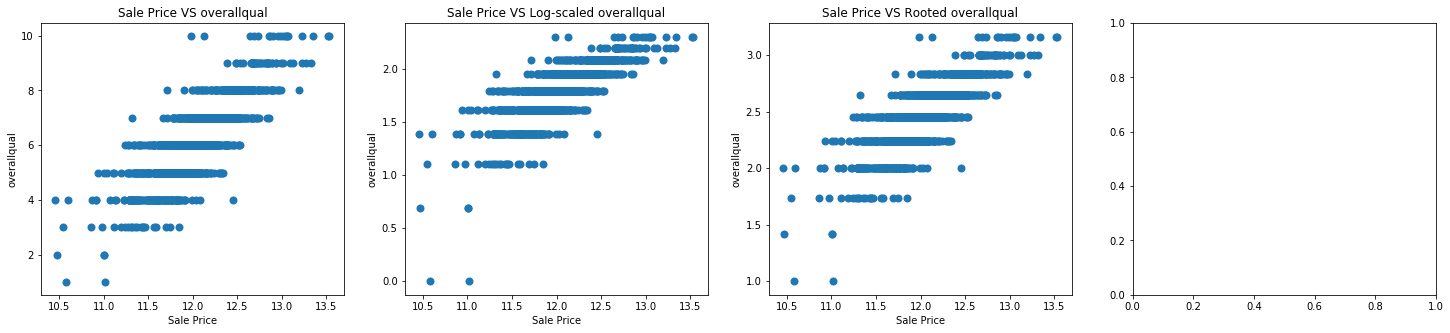

This grapsh is not available due to data type


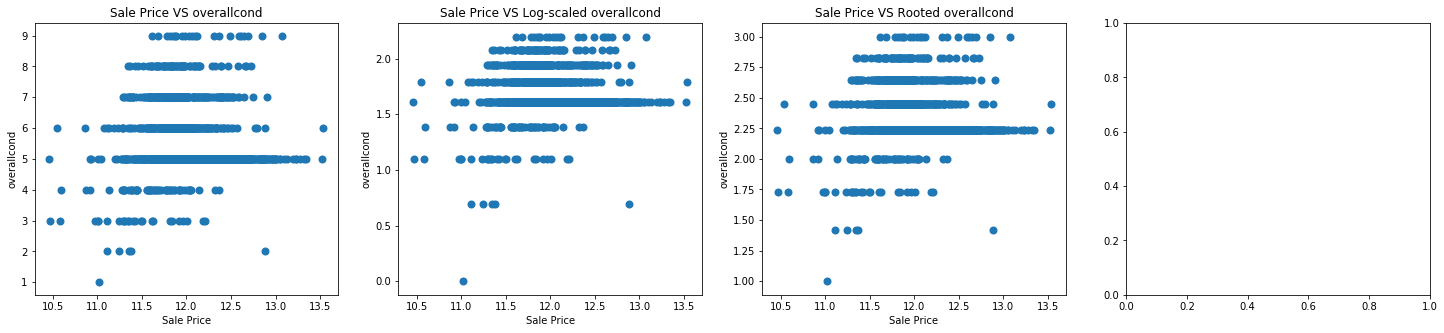

This grapsh is not available due to data type


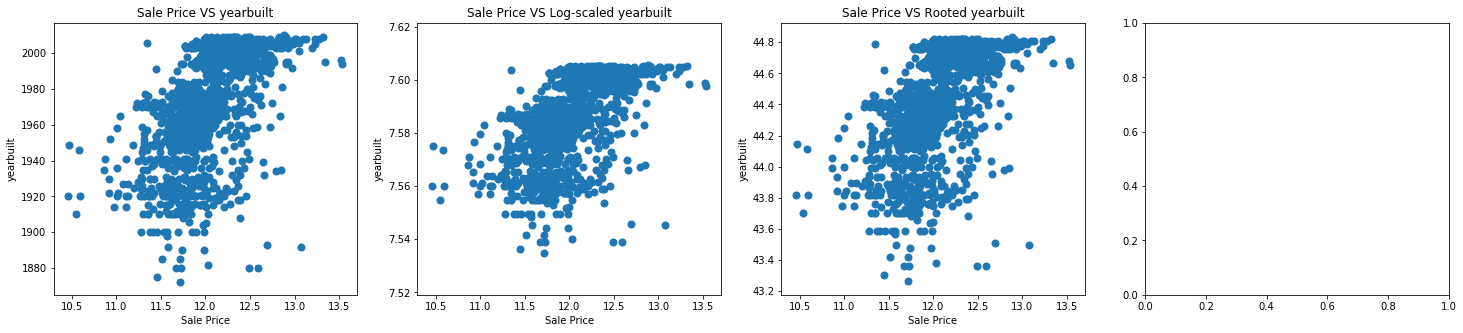

This grapsh is not available due to data type


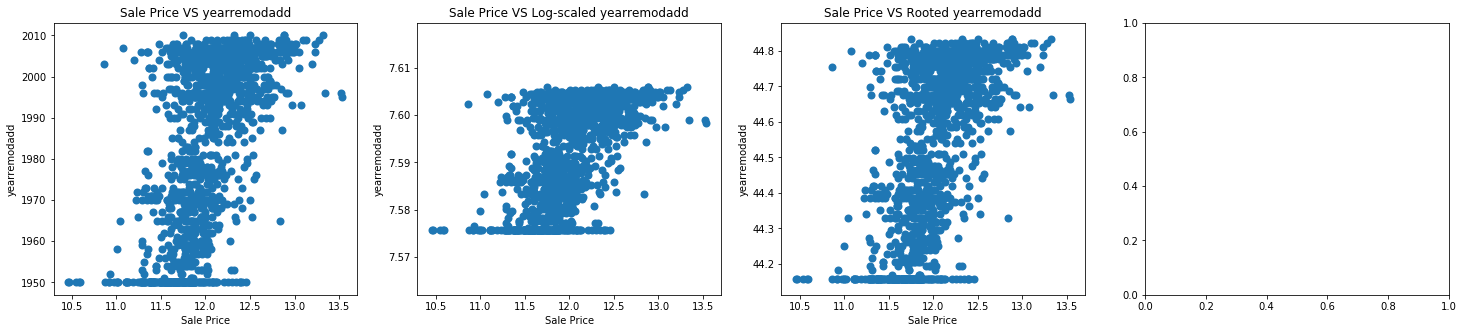

This grapsh is not available due to data type


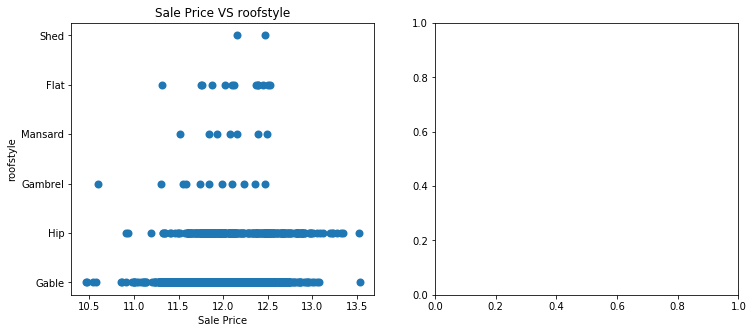

This grapsh is not available due to data type


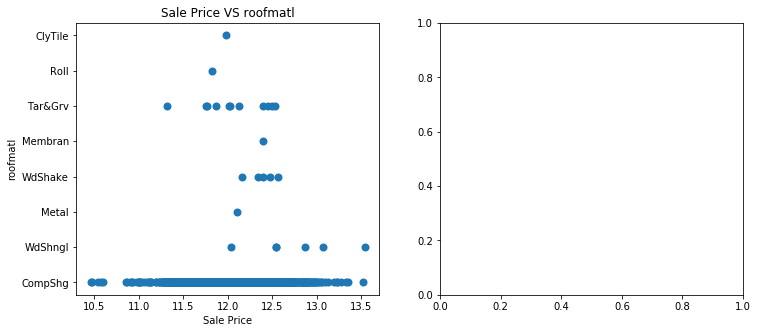

This grapsh is not available due to data type


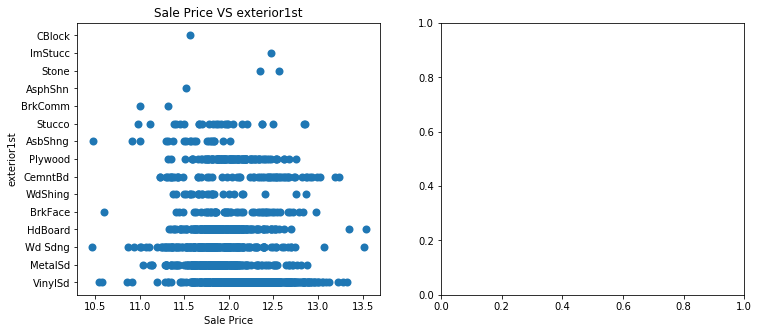

This grapsh is not available due to data type


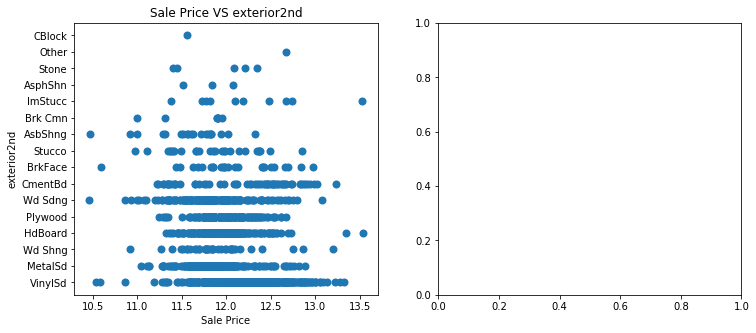

This grapsh is not available due to data type


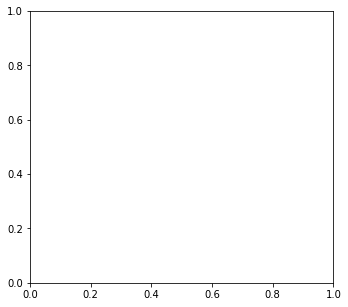

This grapsh is not available due to data type


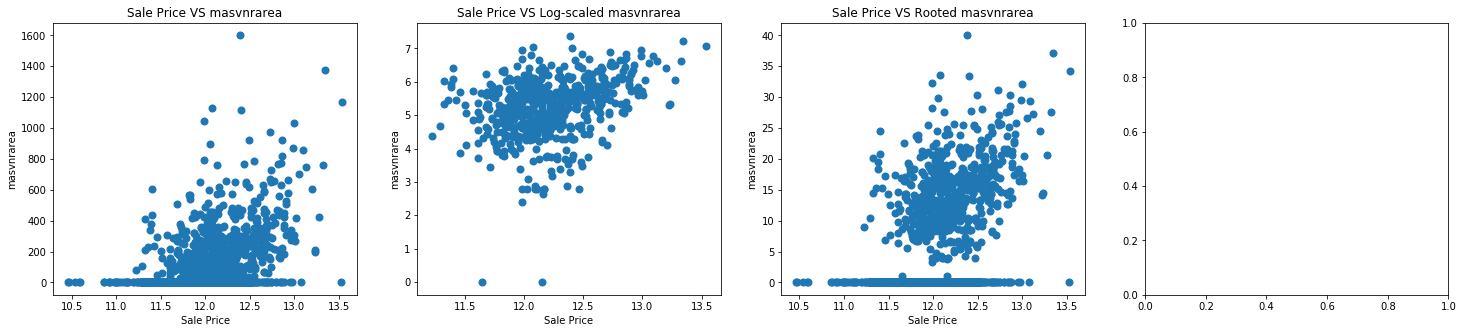

This grapsh is not available due to data type


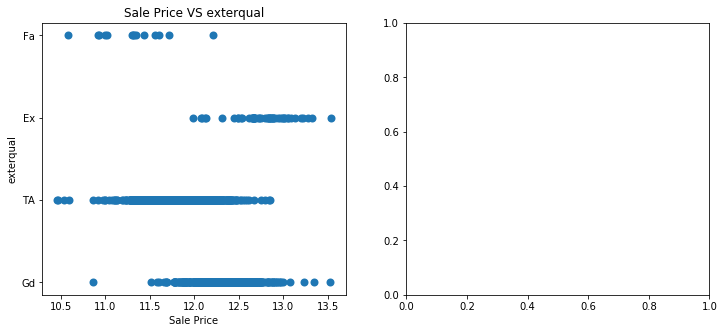

This grapsh is not available due to data type


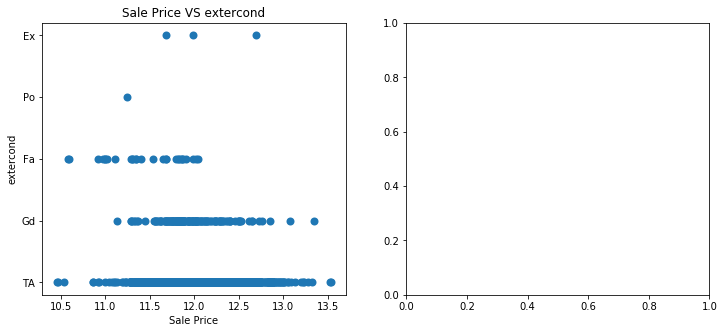

This grapsh is not available due to data type


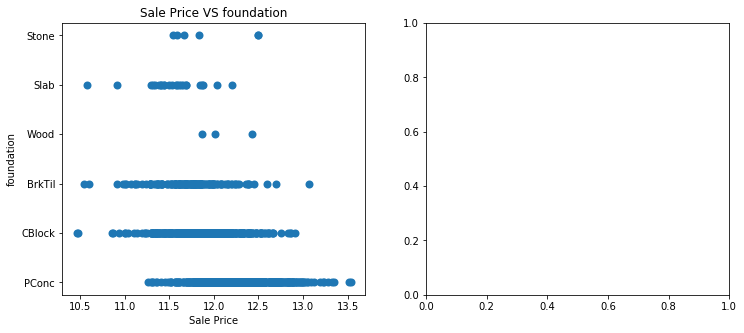

This grapsh is not available due to data type


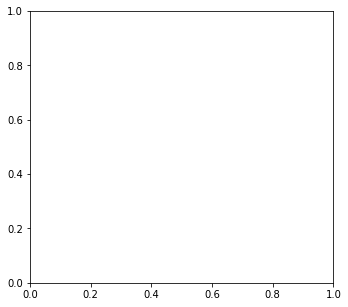

This grapsh is not available due to data type


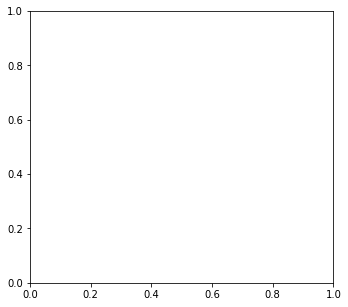

This grapsh is not available due to data type


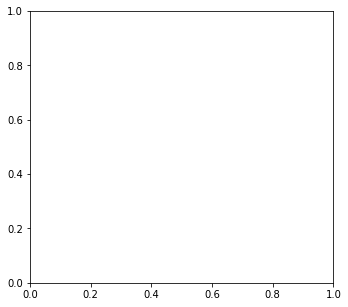

This grapsh is not available due to data type


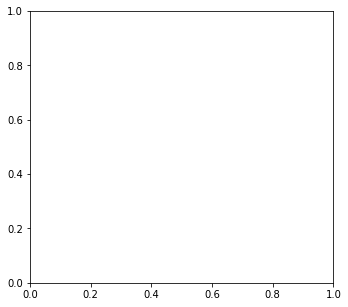

This grapsh is not available due to data type


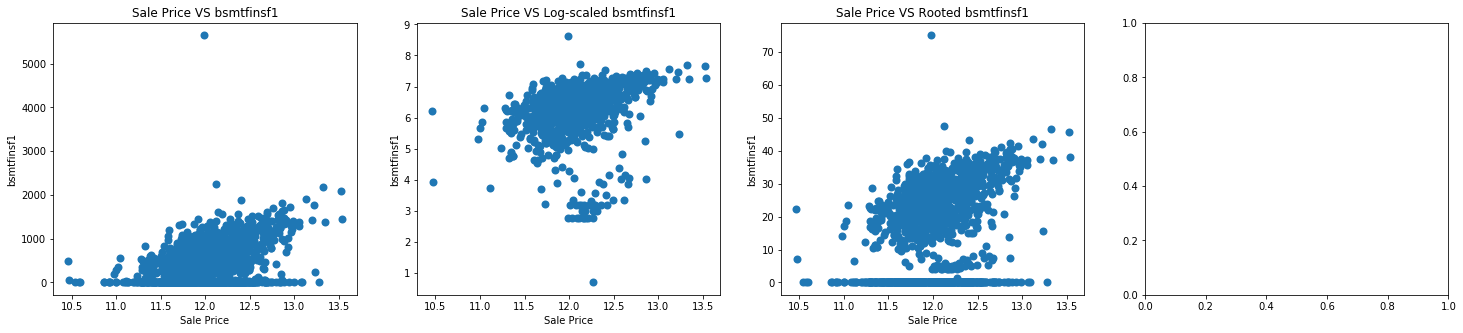

This grapsh is not available due to data type


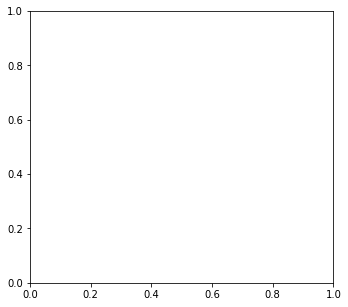

This grapsh is not available due to data type


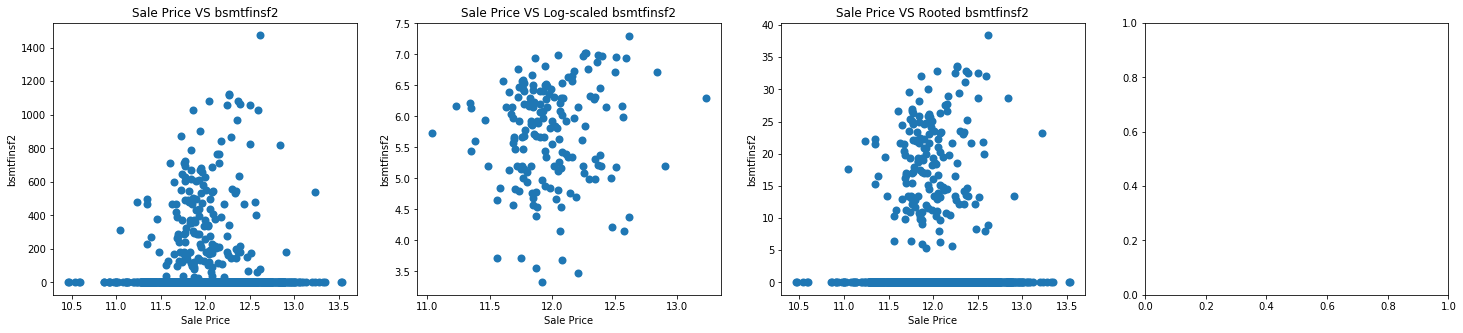

This grapsh is not available due to data type


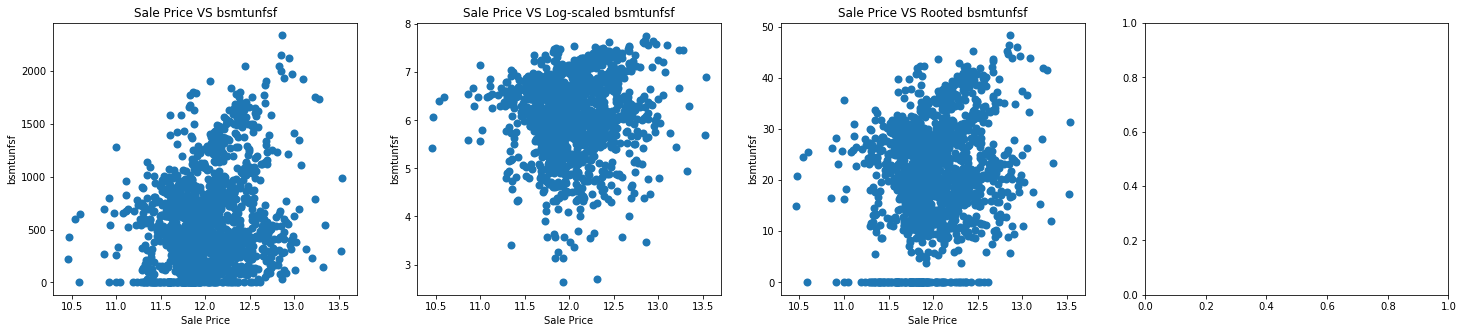

This grapsh is not available due to data type


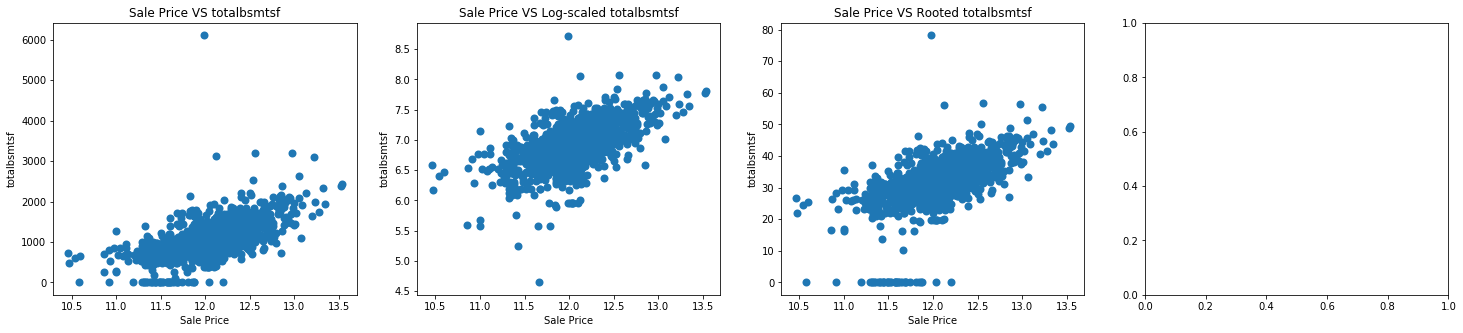

This grapsh is not available due to data type


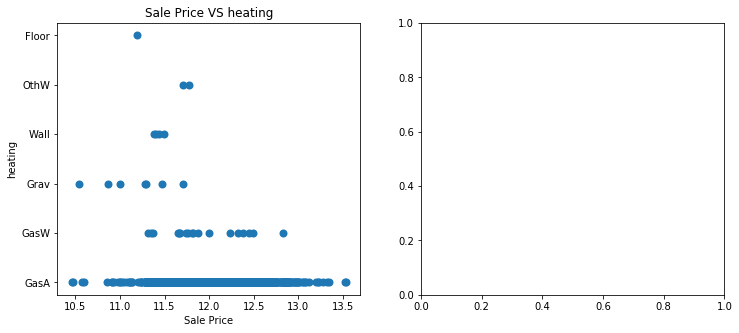

This grapsh is not available due to data type


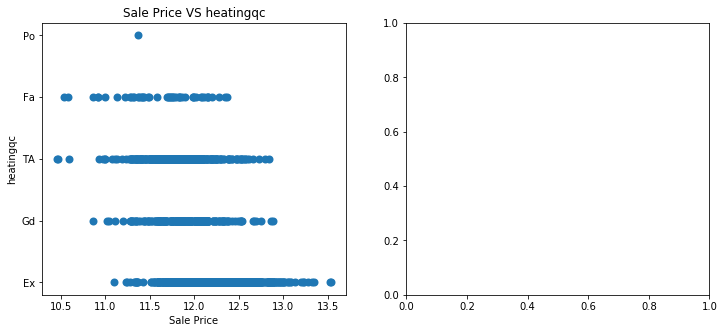

This grapsh is not available due to data type


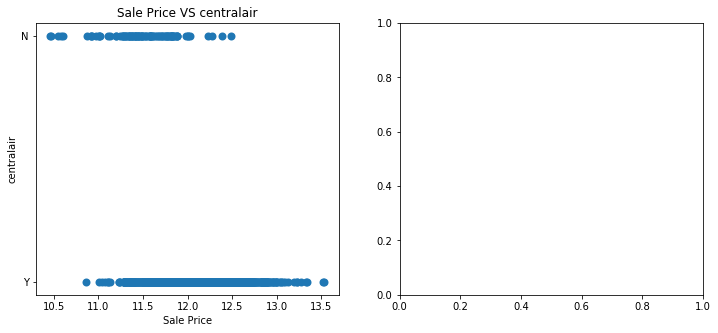

This grapsh is not available due to data type


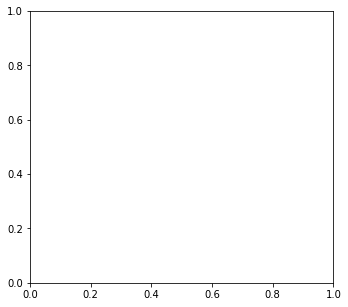

This grapsh is not available due to data type


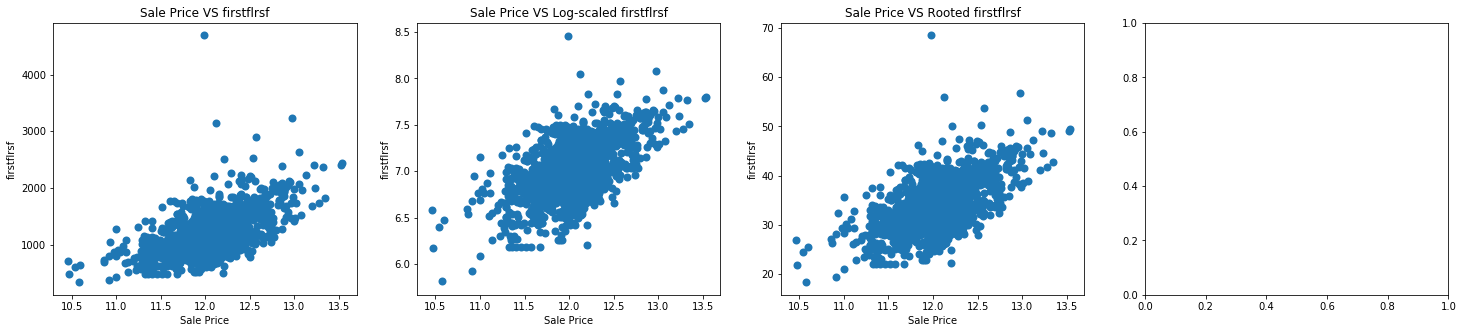

This grapsh is not available due to data type


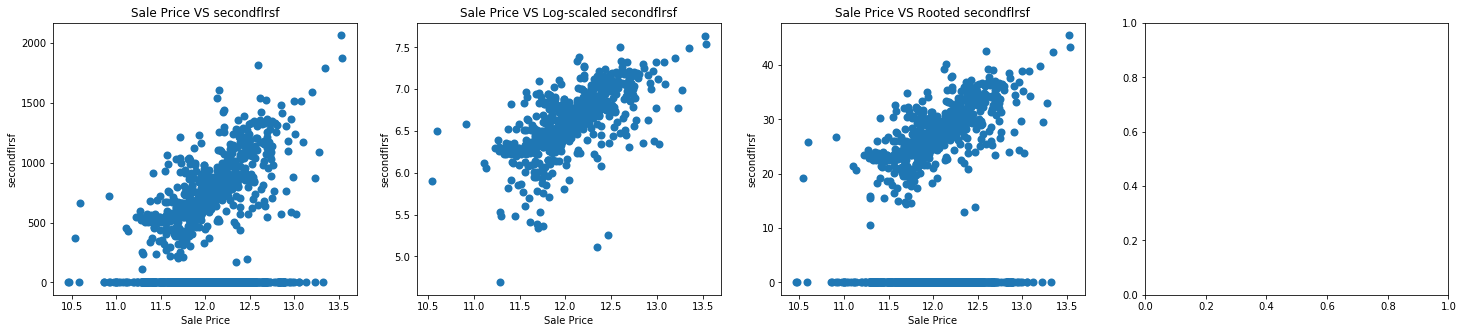

This grapsh is not available due to data type


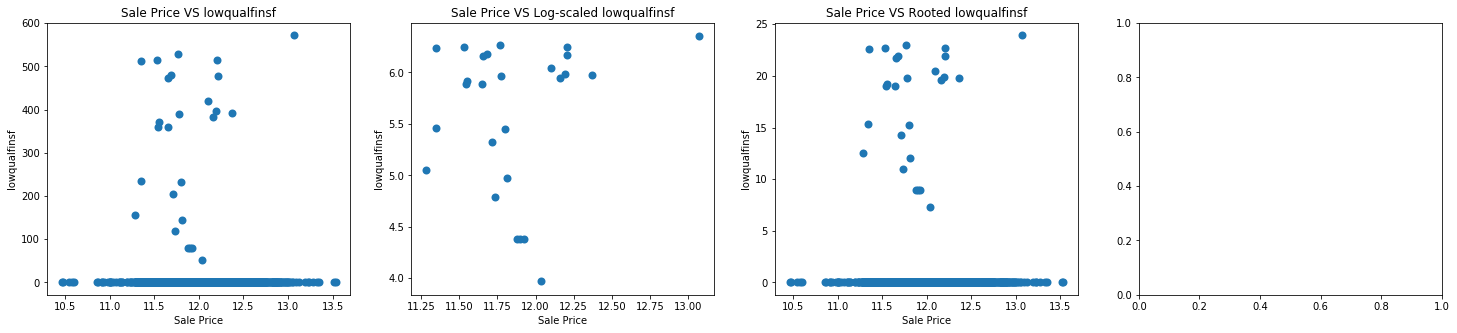

This grapsh is not available due to data type


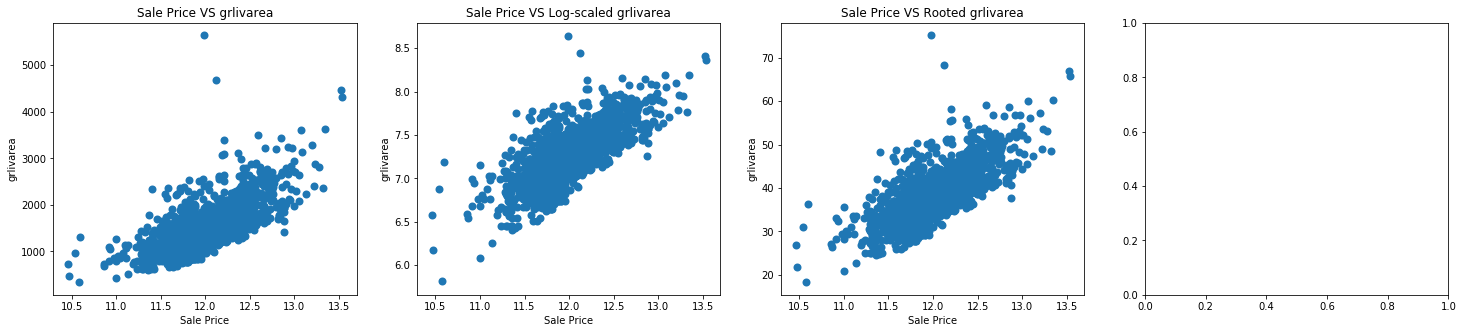

This grapsh is not available due to data type


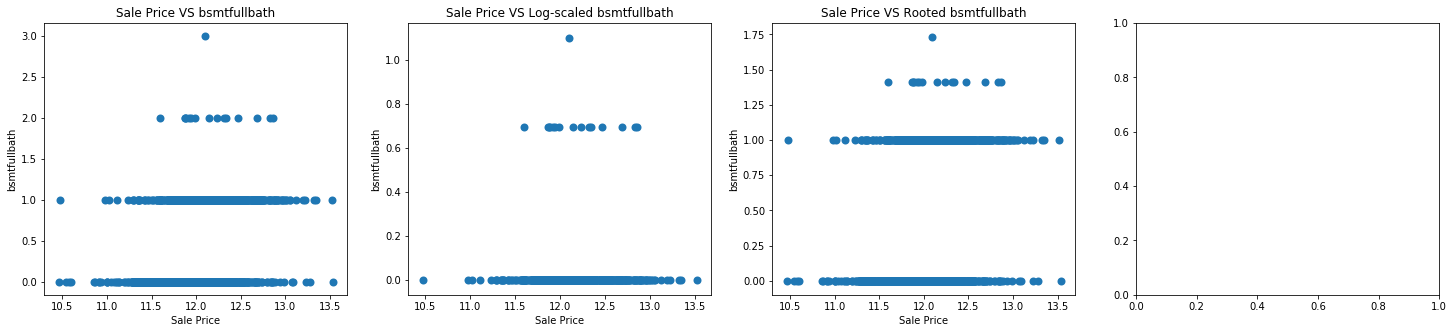

This grapsh is not available due to data type


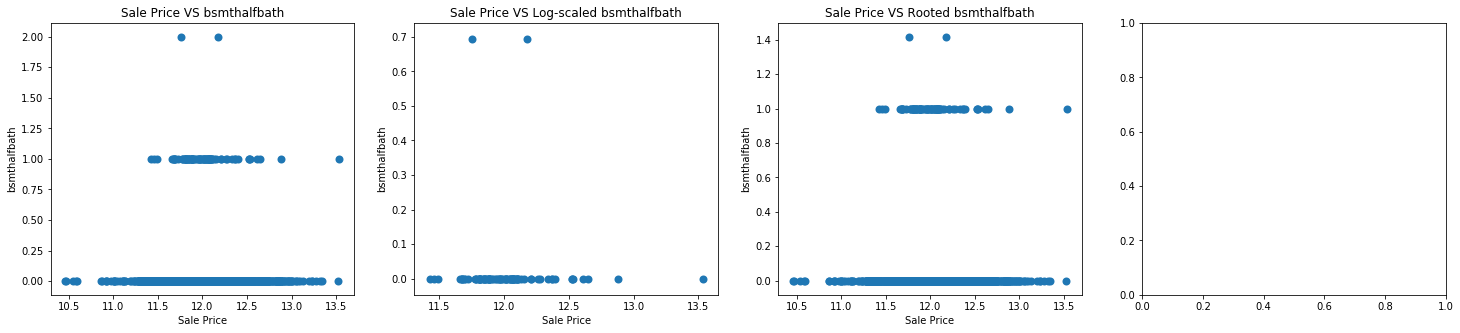

This grapsh is not available due to data type


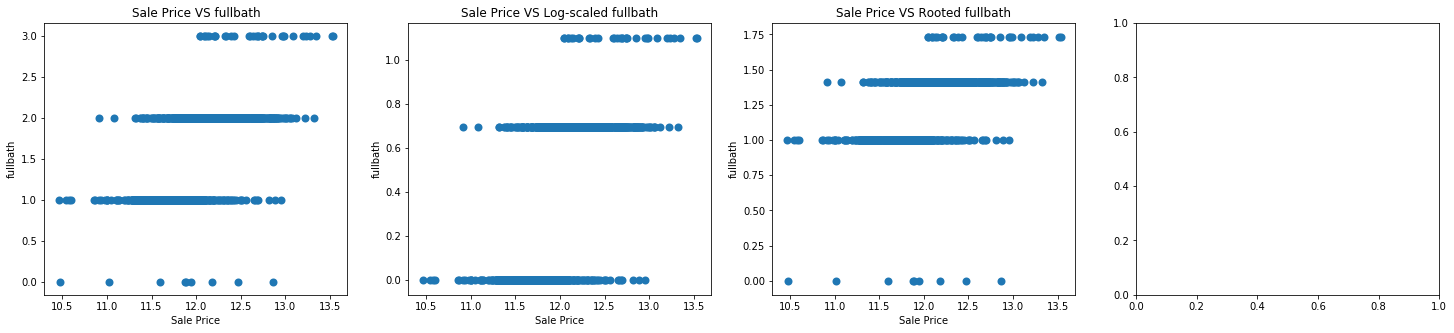

This grapsh is not available due to data type


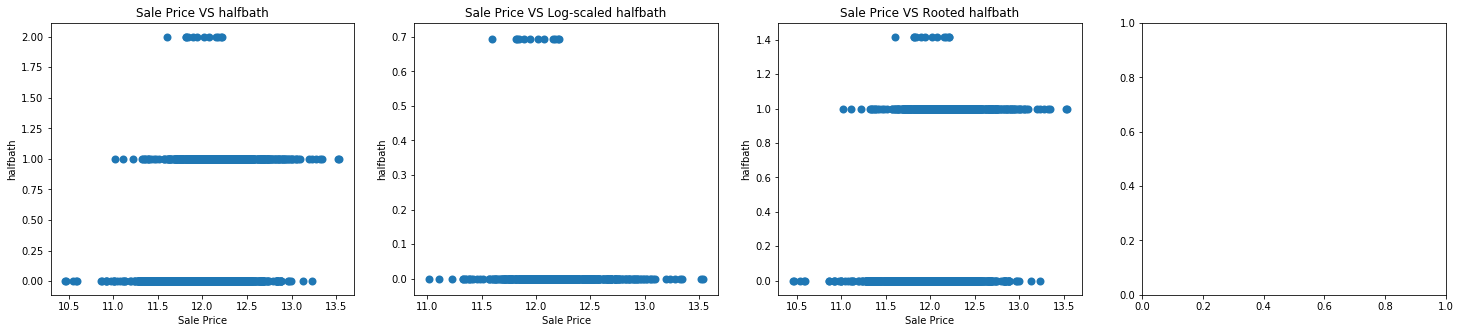

This grapsh is not available due to data type


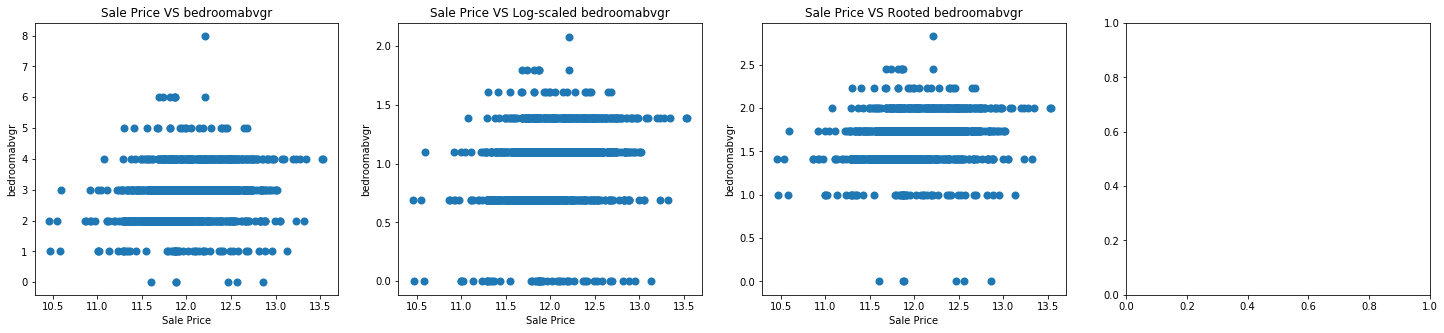

This grapsh is not available due to data type


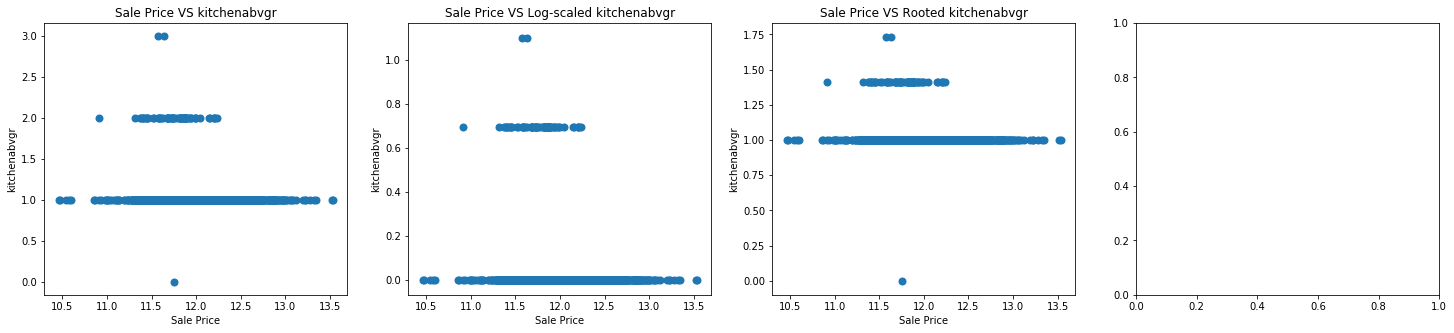

This grapsh is not available due to data type


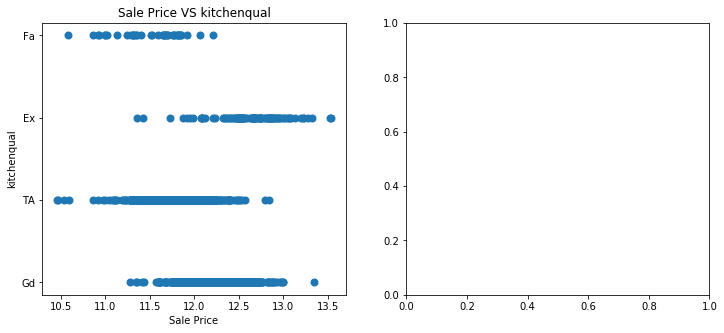

This grapsh is not available due to data type


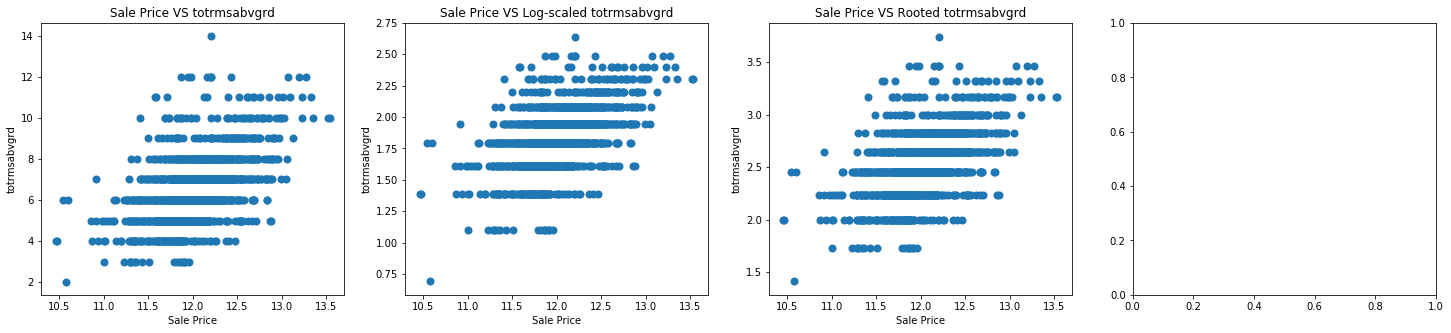

This grapsh is not available due to data type


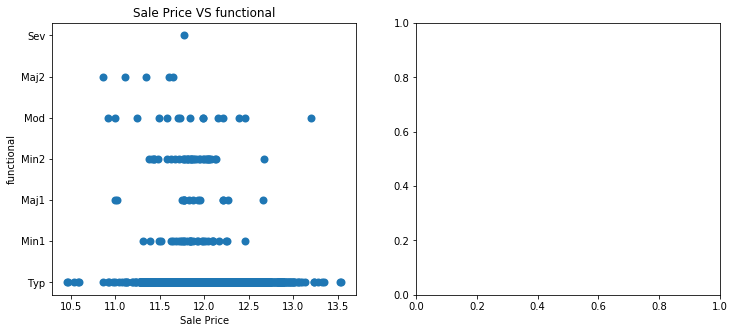

This grapsh is not available due to data type


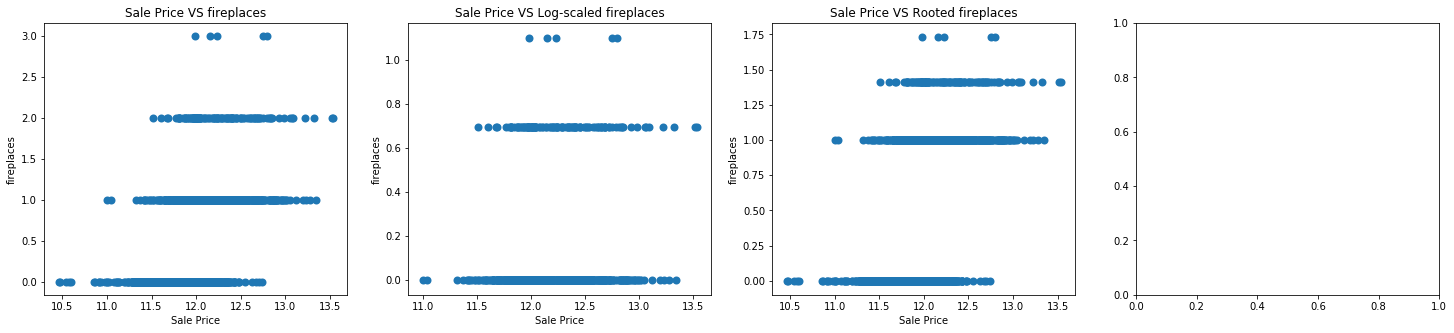

This grapsh is not available due to data type


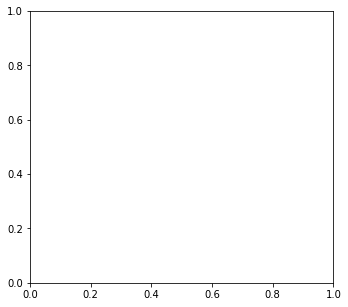

This grapsh is not available due to data type


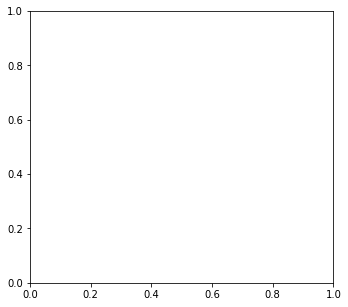

This grapsh is not available due to data type


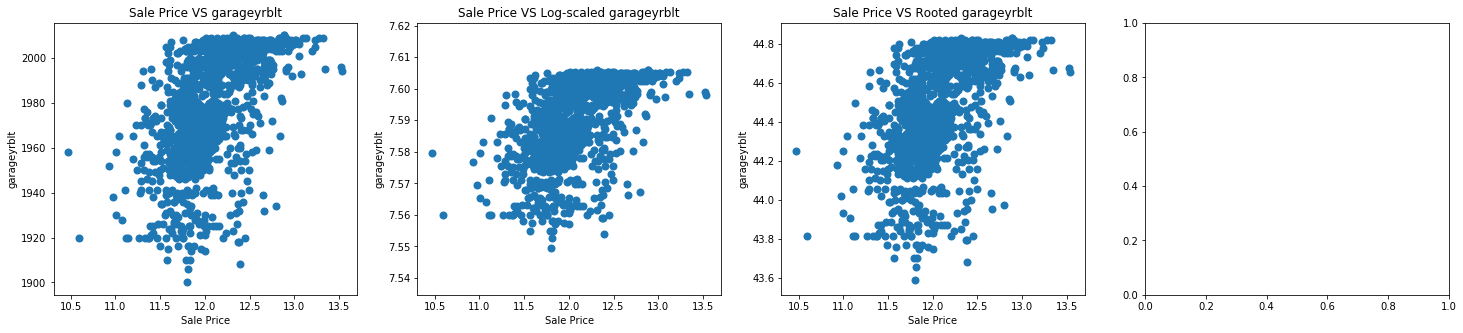

This grapsh is not available due to data type


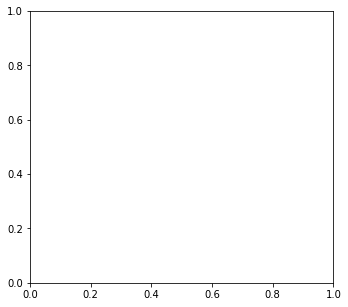

This grapsh is not available due to data type


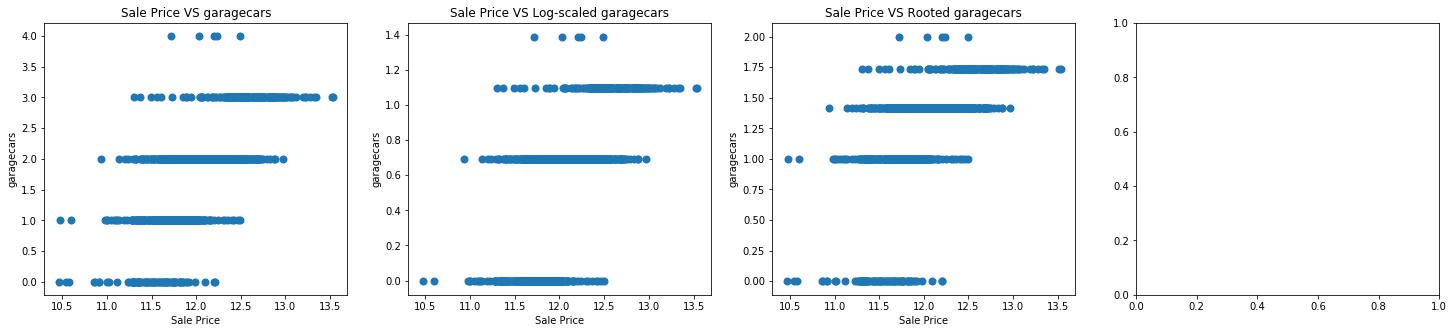

This grapsh is not available due to data type


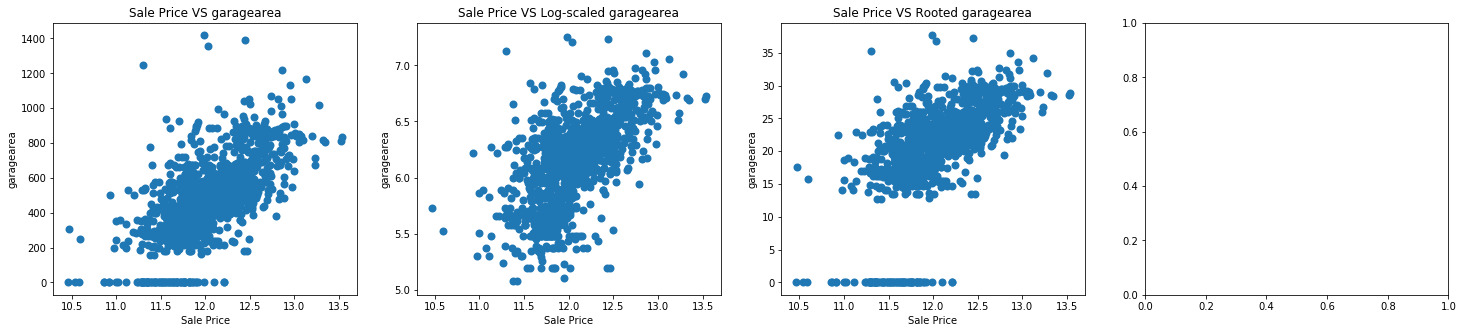

This grapsh is not available due to data type


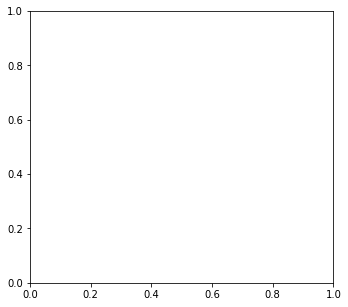

This grapsh is not available due to data type


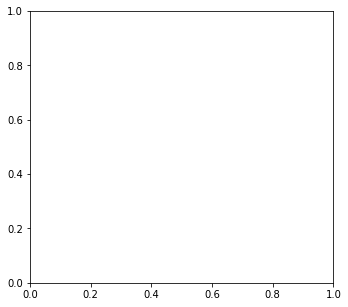

This grapsh is not available due to data type


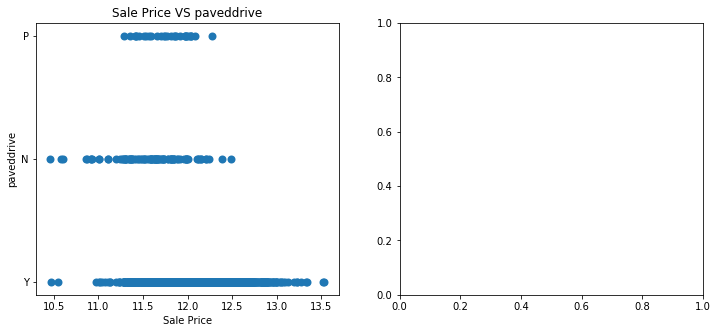

This grapsh is not available due to data type


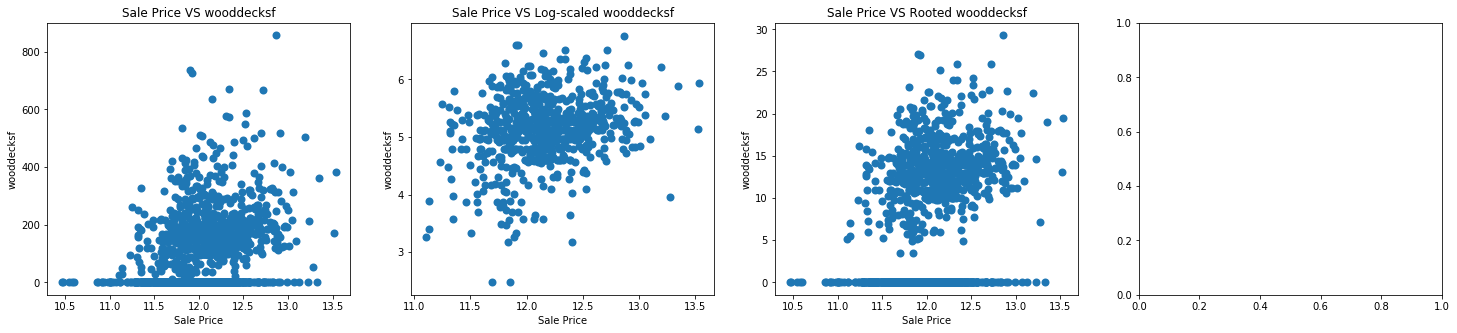

This grapsh is not available due to data type


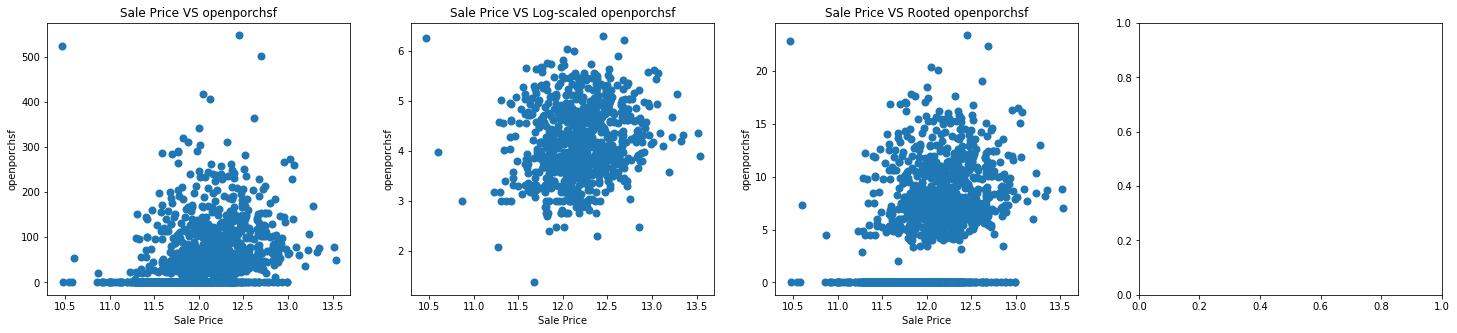

This grapsh is not available due to data type


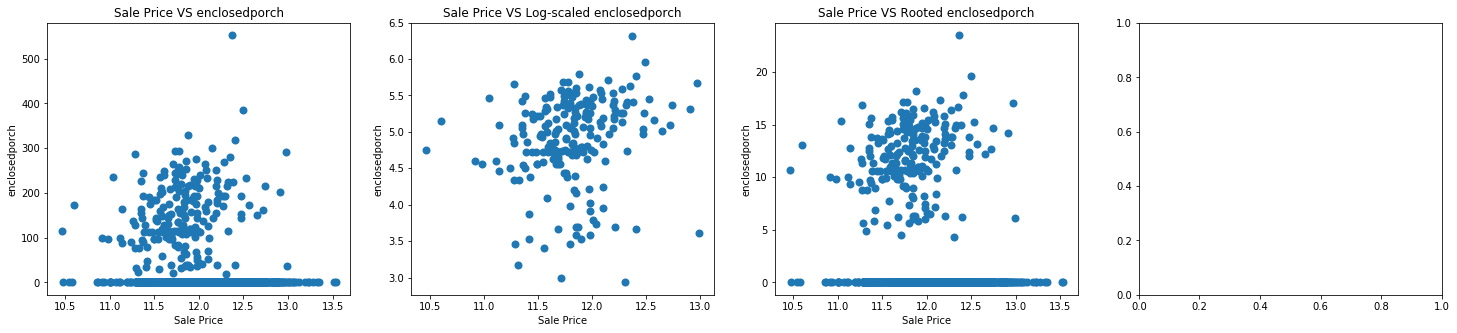

This grapsh is not available due to data type


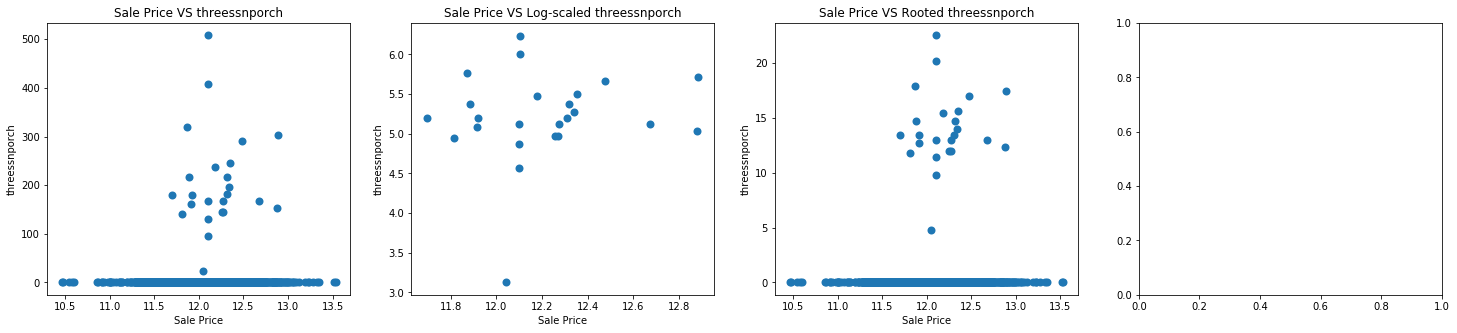

This grapsh is not available due to data type


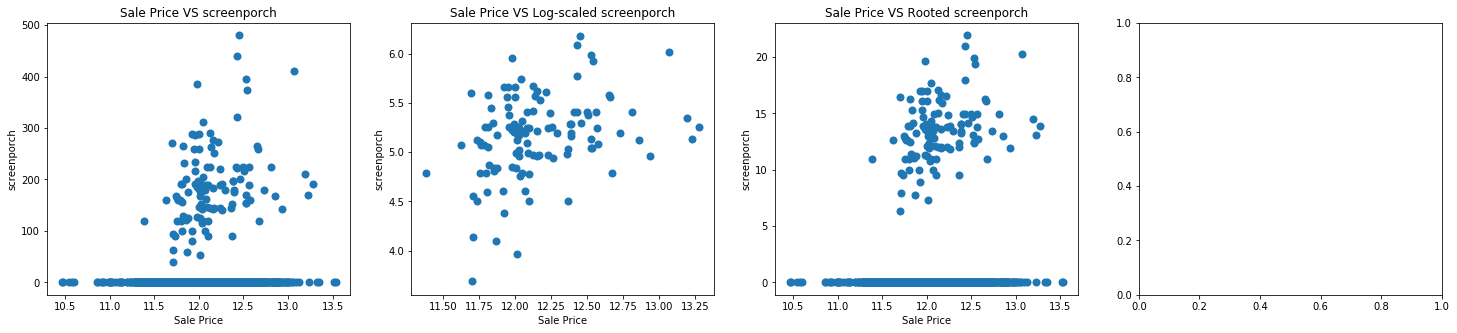

This grapsh is not available due to data type


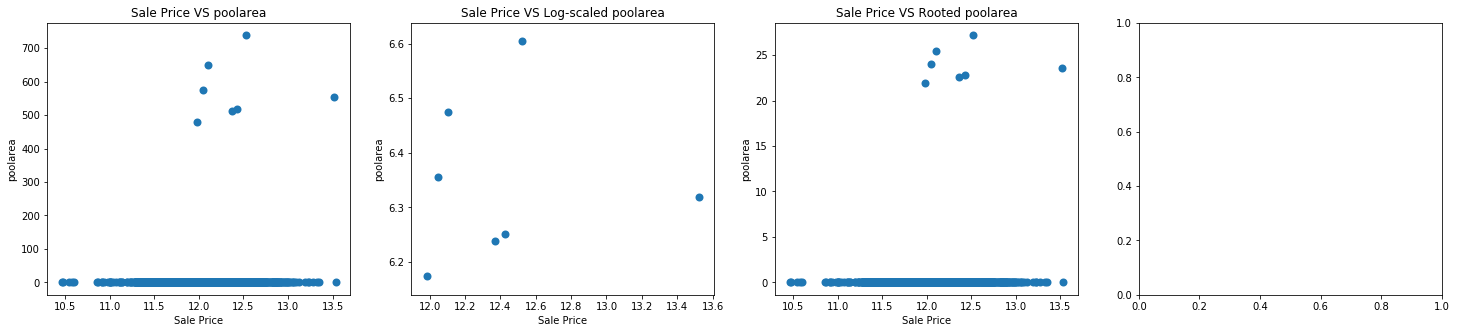

This grapsh is not available due to data type


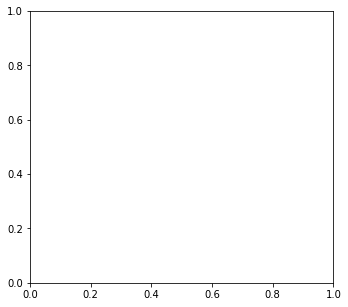

This grapsh is not available due to data type


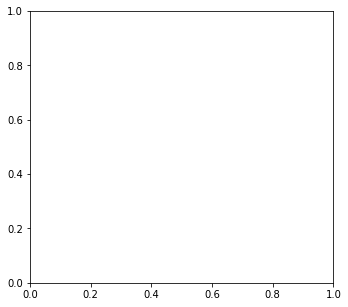

This grapsh is not available due to data type


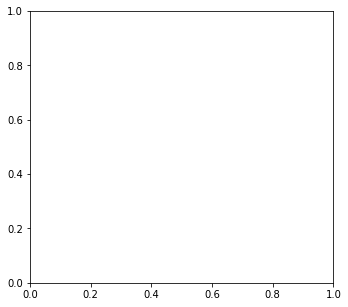

This grapsh is not available due to data type


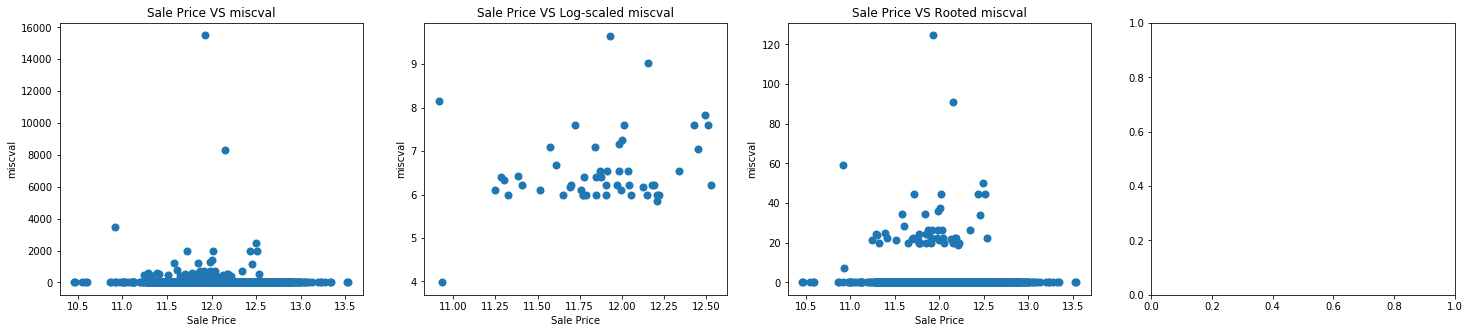

This grapsh is not available due to data type


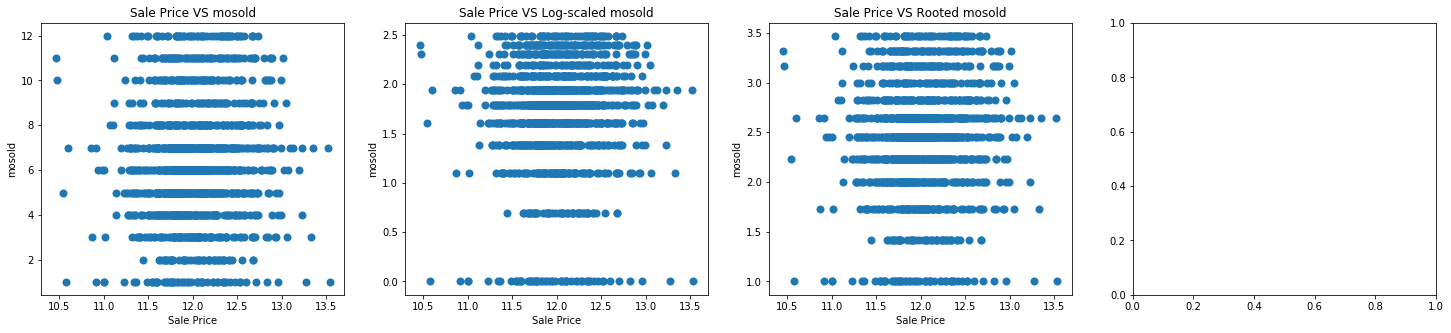

This grapsh is not available due to data type


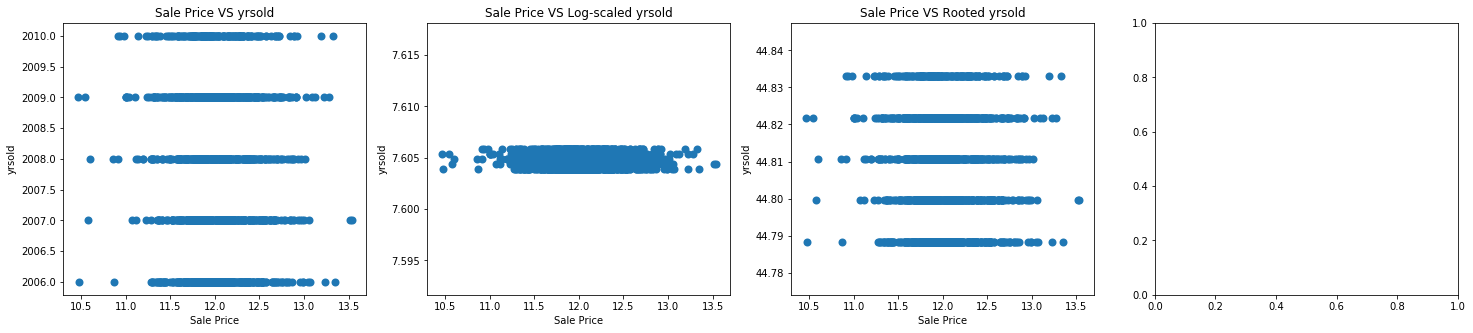

This grapsh is not available due to data type


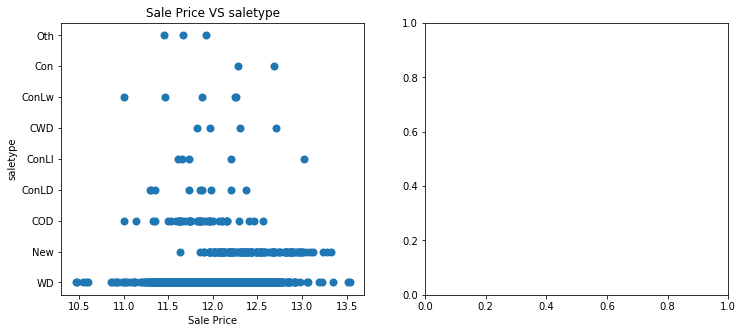

This grapsh is not available due to data type


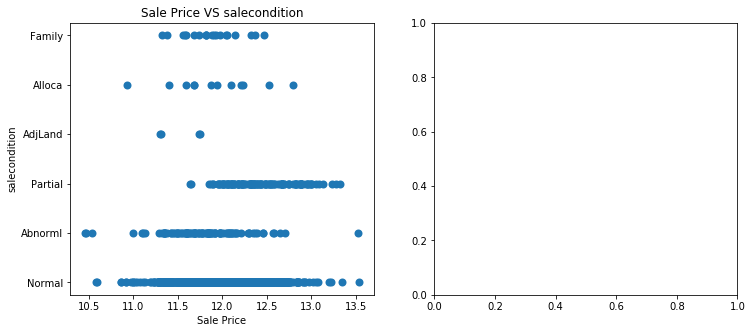

This grapsh is not available due to data type


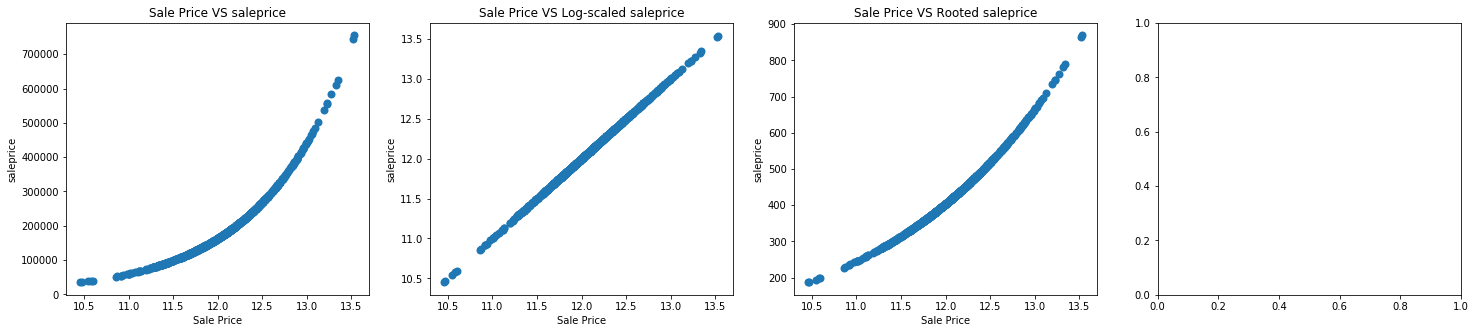

In [10]:
# At this time, let's adopt log-scale to the salesprice.
for col in hp_df.columns:
    try: 
        x = np.log(hp_df['saleprice'])
        
        y = hp_df[col]
        plt.figure(figsize=(25,5))
        
        plt.subplot(1, 4, 1)
        plt.scatter(x, y, linewidths=2)
        plt.title('Sale Price VS {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 2)
        plt.scatter(x, np.log(y), linewidths=2)
        plt.title('Sale Price VS Log-scaled {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 3)
        plt.scatter(x, np.sqrt(y), linewidths=2)
        plt.title('Sale Price VS Rooted {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
        plt.subplot(1, 4, 4)
        plt.scatter(x, winsorize(y), linewidths=2)
        plt.title('Sale Price VS Winsorized {}'.format(col))
        plt.xlabel('Sale Price')
        plt.ylabel('{}'.format(col))
        
    except:
        print('This grapsh is not available due to data type')
    plt.show()

In [11]:
hp_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
     

With above graph, I am going to set the features and target value.

**1. Features (log-scaled)** : 'lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'garagearea'  
**2. Target** : log-scaled saleprice

</br>
</br>
</br>

Now, let's make a data set with selected variables.


In [12]:
hp_sel = hp_df[['saleprice', 'lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 
                'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'garagearea']]
hp_sel.head()

saleprice  lotfrontage  lotarea  masvnrarea  bsmtfinsf1  totalbsmtsf  firstflrsf  secondflrsf  grlivarea  garagearea
0     208500         65.0     8450       196.0         706          856         856          854       1710         548
1     181500         80.0     9600         0.0         978         1262        1262            0       1262         460
2     223500         68.0    11250       162.0         486          920         920          866       1786         608
3     140000         60.0     9550         0.0         216          756         961          756       1717         642
4     250000         84.0    14260       350.0         655         1145        1145         1053       2198         836

In [13]:
hp_sel.replace(0, 1, inplace=True)
hp_sel.fillna(1, inplace=True)

In [14]:
hp_sellog = np.log(hp_sel)

In [15]:
hp_sellog.isnull().sum()

saleprice      0
lotfrontage    0
lotarea        0
masvnrarea     0
bsmtfinsf1     0
totalbsmtsf    0
firstflrsf     0
secondflrsf    0
grlivarea      0
garagearea     0
dtype: int64

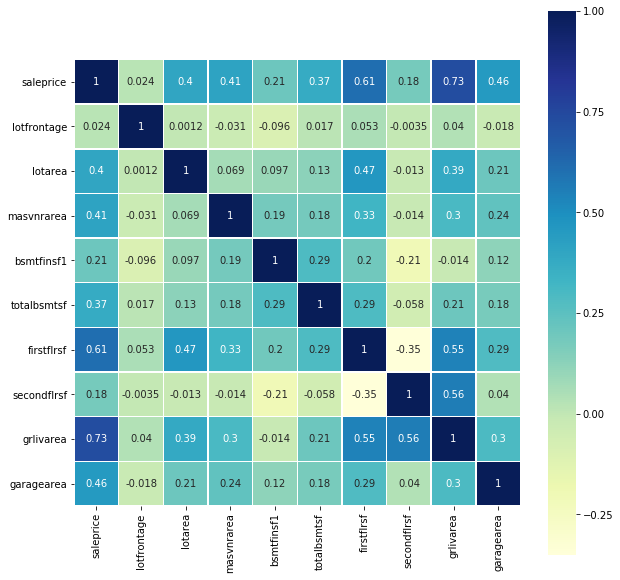

In [16]:
import scipy.stats as stats
import seaborn as sns

hp_sellog_corr = hp_sellog.corr()

plt.figure(figsize=(10,10))
sns.heatmap(hp_sellog_corr, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

Let's pick up two features which are showing over 0.5 correlation with target variable: firstflrsf and grlivarea.  

Now, make a model with linear regression.

In [17]:
hp_sellog_picked = hp_sellog[['saleprice', 'firstflrsf', 'grlivarea']]

In [18]:
Y = hp_sellog_picked['saleprice']
X = hp_sellog_picked[['firstflrsf', 'grlivarea']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [0.3765683  0.67868686]

Intercept: 
 4.45270498328995


`LinearRegression()`'s `fit()` method runs the OLS algorithm by default. Since we get the parameters using OLS, we can write our estimated model:

$$ saleprice = 4.45 + 0.37firstflrsf + 0.68grlivarea$$  


Now, we run the same model, this time using statsmodels.

In [19]:
import statsmodels.api as sm

X_api = sm.add_constant(X)

results = sm.OLS(Y, X_api).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1076.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          1.14e-287
Time:                        09:13:08   Log-Likelihood:                -69.293
No. Observations:                1460   AIC:                             144.6
Df Residuals:                    1457   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4527      0.166     26.833      0.000       4.127       4.778
firstflrsf     0.3766      0.025     15.075      0.000       0.328       0.426
grlivarea      0.6787      0.024     28.522      0.000       0.632       0.725
==============================================================================
Omnibus:                      226.308   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.790
Skew:                          -0.930   Prob(JB):                     2.60e-97
Kurtosis:                       4.962   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task 2

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

Let's check the six assumptions one by one with our house data set.

**1. Assumption one: linearity of the model in its coefficients**

Let's put the raw(nonlog-scaled) data into linear regression model. And then let's see if the model's coefficient and intercept are already calculated one.

In [20]:
df_example = pd.DataFrame()

df_example['X1'] = hp_df['firstflrsf']
df_example['X2'] = hp_df['grlivarea']
df_example['Y1'] = 4.45 + 0.37*hp_df['firstflrsf'] + 0.68*hp_df['grlivarea']

lrm_example = linear_model.LinearRegression()
lrm_example.fit(df_example[['X1', 'X2']], df_example['Y1'])
predictions = lrm_example.predict(df_example[['X1', 'X2']])

print('\nCoefficients :\n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)


Coefficients :
 [0.37 0.68]

Intercept: 
 4.450000000000273


Yes, this is it. Although I put other data, It shows the same coefficient and intercept.  

Now plot a scatter plot for better understanding.

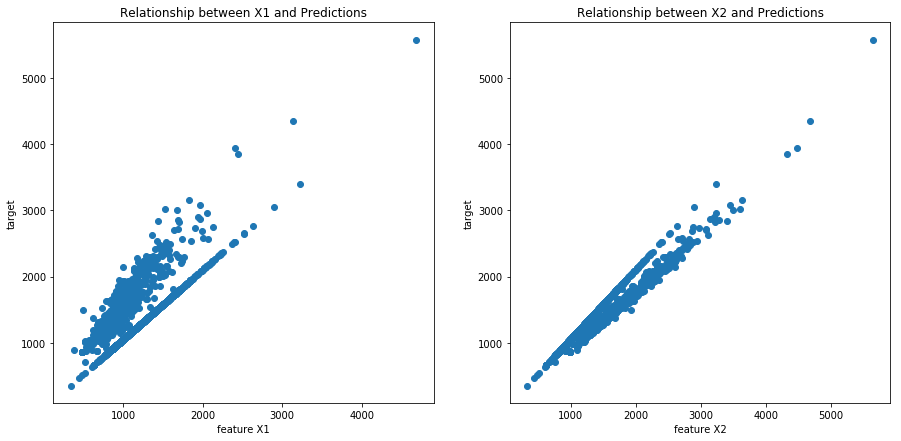

In [21]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.scatter(df_example['X1'], predictions)
plt.xlabel("feature X1")
plt.ylabel("target")
plt.title('Relationship between X1 and Predictions')

plt.subplot(1,2,2)
plt.scatter(df_example['X2'], predictions)
plt.xlabel("feature X2")
plt.ylabel("target")
plt.title('Relationship between X2 and Predictions')
plt.show()

Both X1 and X2 are quite linearly fit to prediction values.

**2. Assumption two: the error term should be zero on average**

In [22]:
predictions0 = lrm.predict(X)
errors = Y - predictions0

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.2592666635474377e-15


Since, we include the constant term in the model, the average of the model's error is effectively zero.  

**3. Assumption three: homoscedasticity**

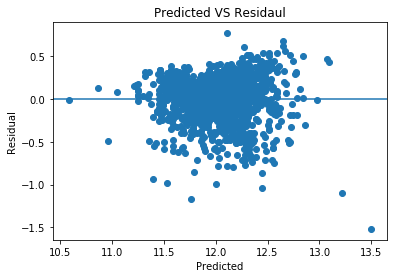

In [23]:
plt.scatter(predictions0, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Predicted VS Residaul')
plt.show()

Oh, this one is quite homoscedasticity. Now let's make sure the tedency with some statistical analysis method, **Bartlett and Levene tests.**  

In [24]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions0, errors)
lev_stats = levene(predictions0, errors)

print('Bartlett test statiscital value is {0:3g} and p-value is {1:.3g}'.format(bart_stats[0], bart_stats[1]))
print('Levene test statiscital value is {0:3g} and p-value is {1:.3g}'.format(lev_stats[0], lev_stats[1]))

Bartlett test statiscital value is 55.0673 and p-value is 1.16e-13
Levene test statiscital value is 71.8099 and p-value is 3.7e-17


Unfortunatley, the p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

**4. Assumption four: low multicollinearity**

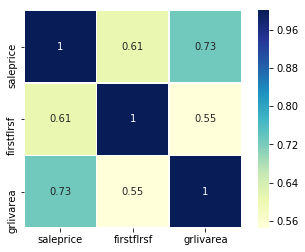

In [26]:
hp_sellog_picked_corr = hp_sellog_picked.corr()

sns.heatmap(hp_sellog_picked_corr, linewidths=0.5, annot=True, square=True, cmap='YlGnBu')
plt.show()

So, our result shows that they are perfect multicollinearity.

**5. Assumption five: error terms should be uncorrelated with one another**

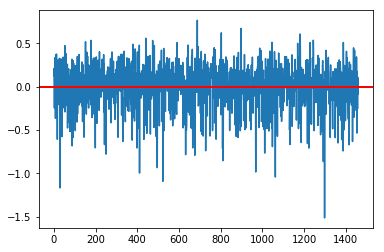

In [32]:
plt.plot(errors)
plt.axhline(y=0, color='r', linewidth=2)
plt.show()

Let's check another way to look at correlations between errors is to use the **autocorrelation function**. This function computes the correlation of a variable with itself. In our case, the order of the errors are the orders of the observations. We can use the `acf()` function from statsmodels

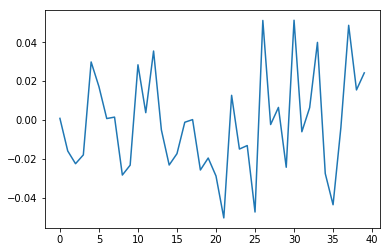

In [33]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our medical costs model is indeed very low (ranging between -0.04 and 0.04).

**6. Assumption six: features shouldn't be correlated with the errors**